# Chapter 10

# Data Uploading

In [1]:

##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
from scipy.stats import chi2
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle
plt.style.use(['dark_background'])




In [2]:
df = pd.read_csv("50_10_train.csv")

In [3]:
df

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

## Data EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [6]:
df.describe()

base_date     base_hour    lane_count   road_rating  multi_linked  \
count  4.701217e+06  4.701217e+06  4.701217e+06  4.701217e+06  4.701217e+06   
mean   2.021672e+07  1.192820e+01  1.836651e+00  1.049585e+02  4.762597e-04   
std    4.555709e+03  6.722092e+00  6.877513e-01  1.840107e+00  2.181818e-02   
min    2.021090e+07  0.000000e+00  1.000000e+00  1.030000e+02  0.000000e+00   
25%    2.021110e+07  6.000000e+00  1.000000e+00  1.030000e+02  0.000000e+00   
50%    2.022013e+07  1.200000e+01  2.000000e+00  1.060000e+02  0.000000e+00   
75%    2.022050e+07  1.800000e+01  2.000000e+00  1.070000e+02  0.000000e+00   
max    2.022073e+07  2.300000e+01  3.000000e+00  1.070000e+02  1.000000e+00   

       connect_code  maximum_speed_limit  vehicle_restricted  \
count  4.701217e+06         4.701217e+06           4701217.0   
mean   2.660218e-01         6.125329e+01                 0.0   
std    5.227760e+00         1.213354e+01                 0.0   
min    0.000000e+00         3.000000e+01                 0.0   
25%    0.000000e+00         5.000000e+01                 0.0   
50%    0.000000e+00         6.000000e+01                 0.0   
75%    0.000000e+00         7.000000e+01                 0.0   
max    1.030000e+02         8.000000e+01                 0.0   

       weight_restricted  height_restricted     road_type  start_latitude  \
count       4.701217e+06          4701217.0  4.701217e+06    4.701217e+06   
mean        5.618742e+03                0.0  6.152237e-01    3.338432e+01   
std         1.395343e+04                0.0  1.211268e+00    1.012015e-01   
min         0.000000e+00                0.0  0.000000e+00    3.324343e+01   
25%         0.000000e+00                0.0  0.000000e+00    3.326422e+01   
50%         0.000000e+00                0.0  0.000000e+00    3.341257e+01   
75%         0.000000e+00                0.0  0.000000e+00    3.347804e+01   
max         5.000000e+04                0.0  3.000000e+00    3.355608e+01   

       start_longitude  end_latitude  end_longitude        target  
count     4.701217e+06  4.701217e+06   4.701217e+06  4.701217e+06  
mean      1.265217e+02  3.338432e+01   1.265217e+02  4.278844e+01  
std       1.563657e-01  1.011948e-01   1.563519e-01  1.595443e+01  
min       1.261826e+02  3.324343e+01   1.261826e+02  1.000000e+00  
25%       1.264232e+02  3.326422e+01   1.264232e+02  3.000000e+01  
50%       1.265112e+02  3.341257e+01   1.265112e+02  4.300000e+01  
75%       1.265840e+02  3.347804e+01   1.265840e+02  5.400000e+01  
max       1.269309e+02  3.355608e+01   1.269309e+02  1.130000e+02

In [7]:
df.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df_original = df.copy()

In [10]:
for i in df.columns:
    print('=================================')
    print(df[i].value_counts().head(5))

id
TRAIN_0000000    1
TRAIN_3134142    1
TRAIN_3134148    1
TRAIN_3134147    1
TRAIN_3134146    1
Name: count, dtype: int64
base_date
20220603    20544
20220504    20460
20220602    20441
20220626    20429
20220609    20415
Name: count, dtype: int64
day_of_week
금    684024
수    675583
목    674070
일    673632
토    669767
Name: count, dtype: int64
base_hour
15    214541
13    214297
14    214182
12    211833
19    209870
Name: count, dtype: int64
lane_count
2    2352092
1    1558531
3     790594
Name: count, dtype: int64
road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64
road_name
일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
Name: count, dtype: int64
multi_linked
0    4698978
1       2239
Name: count, dtype: int64
connect_code
0      4689075
103      12142
Name: count, dtype: int64
maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
Name: count, dtype: in

In [11]:
df

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

In [12]:
 df['speed_over']= np.where(df['maximum_speed_limit'] < df['target'],1,0)

In [13]:
df['speed_over'].value_counts()

speed_over
0    4241412
1     459805
Name: count, dtype: int64

In [14]:
df.shape

(4701217, 24)

In [15]:
459805 / 4701217

0.0978055256755857

<Axes: >

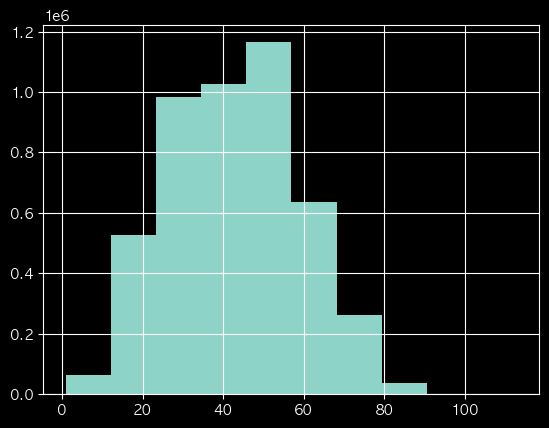

In [16]:
df['target'].hist()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

## categorical and numerical split

In [18]:
categorical_list = []

numerical_list =  []



for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

In [19]:
categorical_list

['id',
 'day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [20]:
numerical_list

['base_date',
 'base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'vehicle_restricted',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'target',
 'speed_over']

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
df_brief  = df.copy()

In [24]:
for i in categorical_list:
    le.fit(df_brief[i])
    df_brief[i] = le.transform(df_brief[i])

In [25]:
df_brief

id  base_date  day_of_week  base_hour  lane_count  road_rating  \
0              0   20220623            1         17           1          106   
1              1   20220728            1         21           2          103   
2              2   20211010            4          7           2          103   
3              3   20220311            0         13           2          107   
4              4   20211005            6          8           2          103   
...          ...        ...          ...        ...         ...          ...   
4701212  4701212   20211104            1         16           1          107   
4701213  4701213   20220331            1          2           2          107   
4701214  4701214   20220613            3         22           2          103   
4701215  4701215   20211020            2          2           2          103   
4701216  4701216   20211019            6          6           2          107   

         road_name  multi_linked  connect_code  maximum_speed_limit  \
0               46             0             0                 60.0   
1               34             0             0                 60.0   
2               36             0             0                 80.0   
3               57             0             0                 50.0   
4               35             0             0                 80.0   
...            ...           ...           ...                  ...   
4701212          0             0             0                 50.0   
4701213          0             0             0                 80.0   
4701214         35             0             0                 60.0   
4701215         37             0             0                 80.0   
4701216          1             0             0                 60.0   

         vehicle_restricted  weight_restricted  height_restricted  road_type  \
0                       0.0            32400.0                0.0          3   
1                       0.0                0.0                0.0          0   
2                       0.0                0.0                0.0          0   
3                       0.0                0.0                0.0          0   
4                       0.0                0.0                0.0          0   
...                     ...                ...                ...        ...   
4701212                 0.0                0.0                0.0          0   
4701213                 0.0            43200.0                0.0          3   
4701214                 0.0                0.0                0.0          0   
4701215                 0.0                0.0                0.0          0   
4701216                 0.0                0.0                0.0          0   

         start_node_name  start_latitude  start_longitude  \
0                    386       33.427747       126.662612   
1                     32       33.500730       126.529107   
2                    426       33.279145       126.368598   
3                     58       33.246081       126.567204   
4                    267       33.462214       126.326551   
...                  ...             ...              ...   
4701212               79       33.422145       126.278125   
4701213               31       33.472505       126.424368   
4701214               19       33.447183       126.912579   
4701215              392       33.443596       126.431817   
4701216              190       33.256785       126.508940   

         start_turn_restricted  end_node_name  end_latitude  end_longitude  \
0                            0            386     33.427749     126.662335   
1                            1              2     33.504811     126.526240   
2                            0            179     33.280072     126.362147   
3                            0            203     33.245565     126.566228   
4                            0            269     33.462677     126.330152   
...                        ...        

Correlation for All

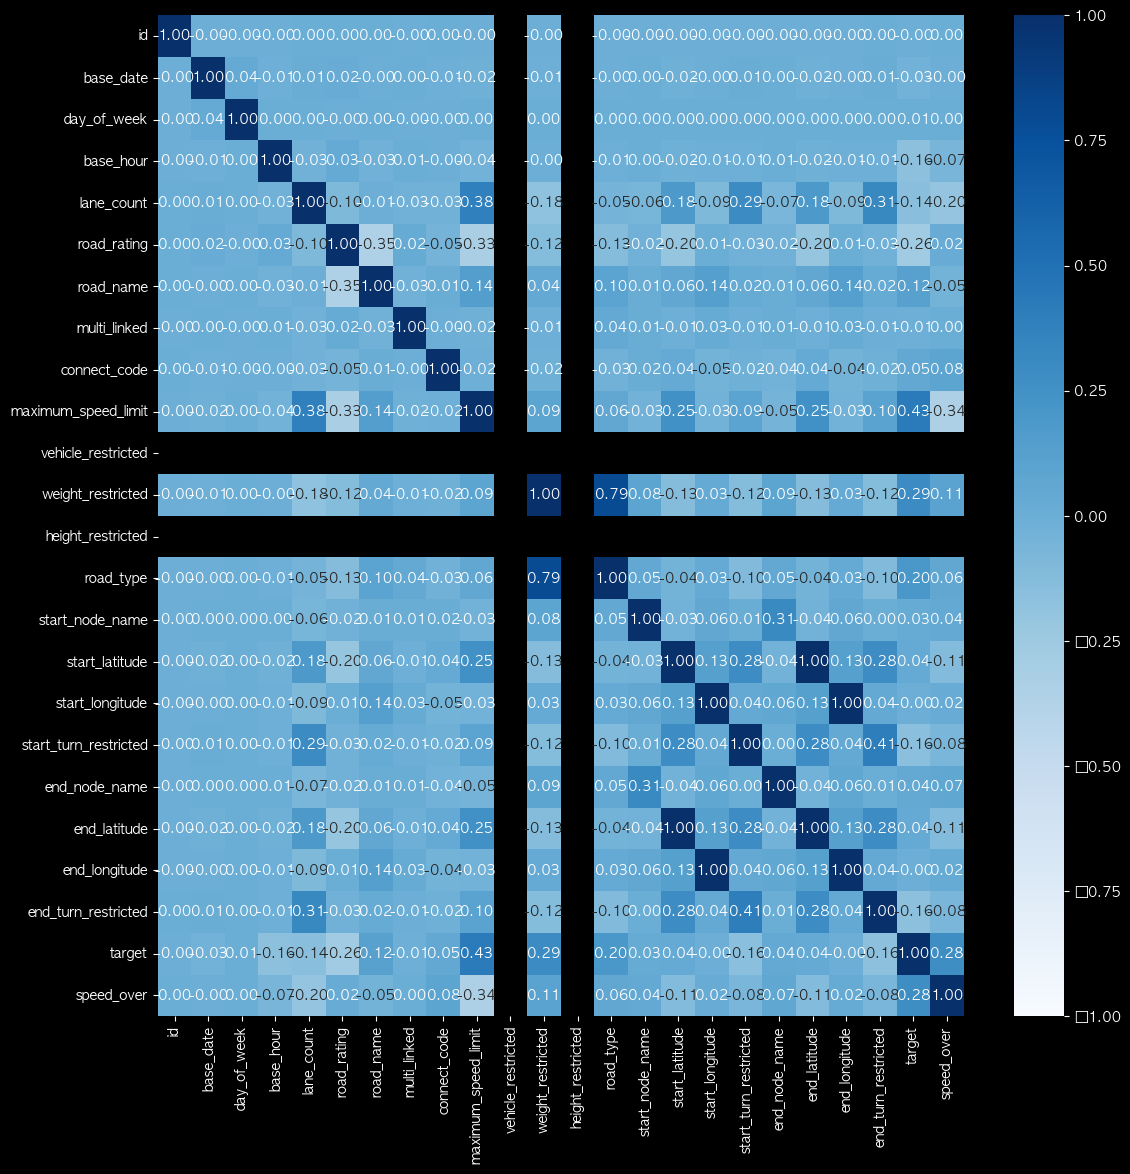

In [26]:
plt.style.use(['dark_background'])

sns.heatmap(df_brief.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1, fmt='.2f')


plt.gcf().set_size_inches(13,13)
plt.show()

In [27]:
df_brief.corr().sort_values(by='speed_over', ascending=False)['speed_over']

speed_over               1.000000
target                   0.276729
weight_restricted        0.106893
connect_code             0.078534
end_node_name            0.065622
road_type                0.055814
start_node_name          0.042174
end_longitude            0.023701
start_longitude          0.023411
road_rating              0.018309
multi_linked             0.004759
day_of_week              0.000567
id                       0.000308
base_date               -0.003113
road_name               -0.046588
base_hour               -0.069321
start_turn_restricted   -0.075820
end_turn_restricted     -0.077754
end_latitude            -0.114437
start_latitude          -0.114559
lane_count              -0.197088
maximum_speed_limit     -0.336513
vehicle_restricted            NaN
height_restricted             NaN
Name: speed_over, dtype: float64

In [28]:
df_brief.corr().sort_values(by='target', ascending=False)['target']

target                   1.000000
maximum_speed_limit      0.425715
weight_restricted        0.294092
speed_over               0.276729
road_type                0.200840
road_name                0.116778
connect_code             0.048348
end_node_name            0.039770
start_latitude           0.036280
end_latitude             0.036139
start_node_name          0.029007
day_of_week              0.006397
id                      -0.000071
end_longitude           -0.001000
start_longitude         -0.001168
multi_linked            -0.008408
base_date               -0.033997
lane_count              -0.144256
start_turn_restricted   -0.156121
base_hour               -0.159407
end_turn_restricted     -0.162815
road_rating             -0.261693
vehicle_restricted            NaN
height_restricted             NaN
Name: target, dtype: float64

In [29]:
df['road_type'].value_counts()

road_type
0    3737117
3     964100
Name: count, dtype: int64

In [30]:
df['road_rating'].value_counts()

road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64

In [31]:
df['base_hour'].value_counts()

base_hour
15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: count, dtype: int64

In [32]:
df_categorical = df[categorical_list]

In [33]:
df_numerical = df[numerical_list]

In [34]:
df_categorical

id day_of_week  road_name start_node_name  \
0        TRAIN_0000000           목  지방도1112호선           제3교래교   
1        TRAIN_0000001           목   일반국도11호선           광양사거리   
2        TRAIN_0000002           일   일반국도16호선            창고천교   
3        TRAIN_0000003           금        태평로           남양리조트   
4        TRAIN_0000004           화   일반국도12호선            애월샷시   
...                ...         ...        ...             ...   
4701212  TRAIN_4701212           목          -           대림사거리   
4701213  TRAIN_4701213           목          -             광삼교   
4701214  TRAIN_4701214           월   일반국도12호선           고성교차로   
4701215  TRAIN_4701215           수   일반국도95호선           제6광령교   
4701216  TRAIN_4701216           화        경찰로          서귀포경찰서   

        start_turn_restricted end_node_name end_turn_restricted  
0                          없음         제3교래교                  없음  
1                          있음        KAL사거리                  없음  
2                          없음          상창육교                  없음  
3                          없음          서현주택                  없음  
4                          없음          애월입구                  없음  
...                       ...           ...                 ...  
4701212                    없음          금덕해운                  없음  
4701213                    없음           광삼교                  없음  
4701214                    없음         성산교차로                  없음  
4701215                    없음        관광대학입구                  없음  
4701216                    없음          시민공원                  없음  

[4701217 rows x 7 columns]

In [35]:
df_categorical['target'] = df['target']
df_categorical['speed_over'] = df['speed_over']

In [36]:
df_numerical

base_date  base_hour  lane_count  road_rating  multi_linked  \
0         20220623         17           1          106             0   
1         20220728         21           2          103             0   
2         20211010          7           2          103             0   
3         20220311         13           2          107             0   
4         20211005          8           2          103             0   
...            ...        ...         ...          ...           ...   
4701212   20211104         16           1          107             0   
4701213   20220331          2           2          107             0   
4701214   20220613         22           2          103             0   
4701215   20211020          2           2          103             0   
4701216   20211019          6           2          107             0   

         connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0                 60.0                 0.0   
1                   0                 60.0                 0.0   
2                   0                 80.0                 0.0   
3                   0                 50.0                 0.0   
4                   0                 80.0                 0.0   
...               ...                  ...                 ...   
4701212             0                 50.0                 0.0   
4701213             0                 80.0                 0.0   
4701214             0                 60.0                 0.0   
4701215             0                 80.0                 0.0   
4701216             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type  start_latitude  \
0                  32400.0                0.0          3       33.427747   
1                      0.0                0.0          0       33.500730   
2                      0.0                0.0          0       33.279145   
3                      0.0                0.0          0       33.246081   
4                      0.0                0.0          0       33.462214   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0       33.422145   
4701213            43200.0                0.0          3       33.472505   
4701214                0.0                0.0          0       33.447183   
4701215                0.0                0.0          0       33.443596   
4701216                0.0                0.0          0       33.256785   

         start_longitude  end_latitude  end_longitude  target  speed_over  
0             126.662612     33.427749     126.662335    52.0           0  
1             126.529107     33.504811     126.526240    30.0           0  
2             126.368598     33.280072     126.362147    61.0           0  
3             126.567204     33.245565     126.566228    20.0           0  
4             126.326551     33.462677     126.330152    38.0           0  
...                  ...           ...            ...     ...         ...  
4701212       126.278125     33.420955     126.273750    20.0           0  
4701213       126.424368     33.472525     126.424890    65.0           0  
4701214       126.912579     33.444121     126.912948    30.0           0  
4701215       126.431817     33.444996     126.433332    73.0           0  
4701216       126.508940     33.257130     126.510364    35.0           0  

[4701217 rows x 17 columns]

In [37]:
df_categorical

id day_of_week  road_name start_node_name  \
0        TRAIN_0000000           목  지방도1112호선           제3교래교   
1        TRAIN_0000001           목   일반국도11호선           광양사거리   
2        TRAIN_0000002           일   일반국도16호선            창고천교   
3        TRAIN_0000003           금        태평로           남양리조트   
4        TRAIN_0000004           화   일반국도12호선            애월샷시   
...                ...         ...        ...             ...   
4701212  TRAIN_4701212           목          -           대림사거리   
4701213  TRAIN_4701213           목          -             광삼교   
4701214  TRAIN_4701214           월   일반국도12호선           고성교차로   
4701215  TRAIN_4701215           수   일반국도95호선           제6광령교   
4701216  TRAIN_4701216           화        경찰로          서귀포경찰서   

        start_turn_restricted end_node_name end_turn_restricted  target  \
0                          없음         제3교래교                  없음    52.0   
1                          있음        KAL사거리                  없음    30.0   
2                          없음          상창육교                  없음    61.0   
3                          없음          서현주택                  없음    20.0   
4                          없음          애월입구                  없음    38.0   
...                       ...           ...                 ...     ...   
4701212                    없음          금덕해운                  없음    20.0   
4701213                    없음           광삼교                  없음    65.0   
4701214                    없음         성산교차로                  없음    30.0   
4701215                    없음        관광대학입구                  없음    73.0   
4701216                    없음          시민공원                  없음    35.0   

         speed_over  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4701212           0  
4701213           0  
4701214           0  
4701215           0  
4701216           0  

[4701217 rows x 9 columns]

## Cateogircal Check

In [38]:
for i in df_categorical:
    print('==========================')
    print(i)
    df_check = df_categorical.groupby(i)['speed_over'].agg(['count', 'sum'])
    df_check['ratio'] = (df_check['sum'] / df_check['count'])*100
    df_check = df_check.sort_values(by='ratio', ascending=False)
    print(df_check.head(10))

id


               count  sum  ratio
id                              
TRAIN_2471332      1    1  100.0
TRAIN_4085042      1    1  100.0
TRAIN_2972994      1    1  100.0
TRAIN_1915525      1    1  100.0
TRAIN_4085061      1    1  100.0
TRAIN_2972998      1    1  100.0
TRAIN_4085050      1    1  100.0
TRAIN_2973008      1    1  100.0
TRAIN_4085046      1    1  100.0
TRAIN_1915507      1    1  100.0
day_of_week
              count    sum     ratio
day_of_week                         
토            669767  66058  9.862833
수            675583  66626  9.862001
일            673632  66340  9.848107
목            674070  66170  9.816488
화            662498  64323  9.709161
월            661643  64214  9.705234
금            684024  66074  9.659603
road_name
            count     sum      ratio
road_name                           
관광단지1로      10706   10517  98.234635
관광단지2로      10126    7873  77.750346
호근로           587     355  60.477002
관광단지로       23116   12405  53.664129
지방도97호선    106113   51191  

Road name feculiar list
road_name
            count     sum      ratio
road_name                           
관광단지1로      10706   10517  98.234635
관광단지2로      10126    7873  77.750346
호근로           587     355  60.477002
관광단지로       23116   12405  53.664129
지방도97호선    106113   51191  48.241968
첨단로         16684    7632  45.744426
지방도1117호선    8677    3578  41.235450
지방도1118호선   84964   29607  34.846523
시민광장로       32320    6394  19.783416

In [39]:
df_categorical

id day_of_week  road_name start_node_name  \
0        TRAIN_0000000           목  지방도1112호선           제3교래교   
1        TRAIN_0000001           목   일반국도11호선           광양사거리   
2        TRAIN_0000002           일   일반국도16호선            창고천교   
3        TRAIN_0000003           금        태평로           남양리조트   
4        TRAIN_0000004           화   일반국도12호선            애월샷시   
...                ...         ...        ...             ...   
4701212  TRAIN_4701212           목          -           대림사거리   
4701213  TRAIN_4701213           목          -             광삼교   
4701214  TRAIN_4701214           월   일반국도12호선           고성교차로   
4701215  TRAIN_4701215           수   일반국도95호선           제6광령교   
4701216  TRAIN_4701216           화        경찰로          서귀포경찰서   

        start_turn_restricted end_node_name end_turn_restricted  target  \
0                          없음         제3교래교                  없음    52.0   
1                          있음        KAL사거리                  없음    30.0   
2                          없음          상창육교                  없음    61.0   
3                          없음          서현주택                  없음    20.0   
4                          없음          애월입구                  없음    38.0   
...                       ...           ...                 ...     ...   
4701212                    없음          금덕해운                  없음    20.0   
4701213                    없음           광삼교                  없음    65.0   
4701214                    없음         성산교차로                  없음    30.0   
4701215                    없음        관광대학입구                  없음    73.0   
4701216                    없음          시민공원                  없음    35.0   

         speed_over  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4701212           0  
4701213           0  
4701214           0  
4701215           0  
4701216           0  

[4701217 rows x 9 columns]

In [40]:
df_check = df_categorical.groupby(['road_name', 'start_node_name'])['speed_over'].agg(['count', 'sum'])
df_check

count   sum
road_name start_node_name             
-         가는질               4784   398
          가동               13748    19
          감귤선과장             3669  3649
          감귤창고             10453  3200
          고림동4거리            3539   125
...                          ...   ...
한천로       제3한천교             6010     0
호근로       식당                 587   355
호서중앙로     CU서귀호근로점           744    13
          서귀포시 호근동 1838-4    744    13
          서호교회              1331    19

[561 rows x 2 columns]

In [41]:
df_check = df_categorical.groupby(['road_name', 'start_node_name'])['speed_over'].agg(['count', 'sum'])
df_check
# df_check = pd.DataFrame(df_check)
# df_check.columns =  ['count']
df_check = df_check.reset_index()
df_check['ratio'] = (df_check['sum'] / df_check['count'])*100
df_check

road_name  start_node_name  count   sum      ratio
0           -              가는질   4784   398   8.319398
1           -               가동  13748    19   0.138202
2           -            감귤선과장   3669  3649  99.454892
3           -             감귤창고  10453  3200  30.613221
4           -           고림동4거리   3539   125   3.532071
..        ...              ...    ...   ...        ...
556       한천로            제3한천교   6010     0   0.000000
557       호근로               식당    587   355  60.477002
558     호서중앙로         CU서귀호근로점    744    13   1.747312
559     호서중앙로  서귀포시 호근동 1838-4    744    13   1.747312
560     호서중앙로             서호교회   1331    19   1.427498

[561 rows x 5 columns]

In [42]:
# 관광단지1로      10706   10517  98.234635
# 관광단지2로      10126    7873  77.750346
# 호근로           587     355  60.477002
# 관광단지로       23116   12405  53.664129
# 지방도97호선    106113   51191  48.241968
# 첨단로         16684    7632  45.744426
# 지방도1117호선    8677    3578  41.235450
# 지방도1118호선   84964   29607  34.846523
# 시민광장로       32320    6394  19.783416

In [43]:
list  = [ '관광단지1로', '관광단지2로', '호근로' ,'관광단지로', '지방도97호선', '첨단로', '지방도1117호선', '지방도1118호선', '시민광장로']

In [44]:
for i in list:
    print('========================================+')
    print(df_check[df_check['road_name'] == i])

========================================+
   road_name start_node_name  count   sum      ratio
81    관광단지1로             야영장   5570  5432  97.522442
82    관광단지1로             전망대   5136  5085  99.007009
========================================+
   road_name start_node_name  count   sum      ratio
83    관광단지2로       선방석재개발(주)   5311  5062  95.311617
84    관광단지2로             전망대   4815  2811  58.380062
========================================+
    road_name start_node_name  count  sum      ratio
557       호근로              식당    587  355  60.477002
========================================+
   road_name start_node_name  count   sum      ratio
85     관광단지로          관광단지입구   5581   859  15.391507
86     관광단지로           산신주유소   5836  1832  31.391364
87     관광단지로       선방석재개발(주)  11699  9714  83.032738
========================================+
    road_name start_node_name  count    sum      ratio
530   지방도97호선             대원교  21305   9855  46.256747
531   지방도97호선          대천동사거리  10570   8203 

In [45]:
df_categorical

id day_of_week  road_name start_node_name  \
0        TRAIN_0000000           목  지방도1112호선           제3교래교   
1        TRAIN_0000001           목   일반국도11호선           광양사거리   
2        TRAIN_0000002           일   일반국도16호선            창고천교   
3        TRAIN_0000003           금        태평로           남양리조트   
4        TRAIN_0000004           화   일반국도12호선            애월샷시   
...                ...         ...        ...             ...   
4701212  TRAIN_4701212           목          -           대림사거리   
4701213  TRAIN_4701213           목          -             광삼교   
4701214  TRAIN_4701214           월   일반국도12호선           고성교차로   
4701215  TRAIN_4701215           수   일반국도95호선           제6광령교   
4701216  TRAIN_4701216           화        경찰로          서귀포경찰서   

        start_turn_restricted end_node_name end_turn_restricted  target  \
0                          없음         제3교래교                  없음    52.0   
1                          있음        KAL사거리                  없음    30.0   
2                          없음          상창육교                  없음    61.0   
3                          없음          서현주택                  없음    20.0   
4                          없음          애월입구                  없음    38.0   
...                       ...           ...                 ...     ...   
4701212                    없음          금덕해운                  없음    20.0   
4701213                    없음           광삼교                  없음    65.0   
4701214                    없음         성산교차로                  없음    30.0   
4701215                    없음        관광대학입구                  없음    73.0   
4701216                    없음          시민공원                  없음    35.0   

         speed_over  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4701212           0  
4701213           0  
4701214           0  
4701215           0  
4701216           0  

[4701217 rows x 9 columns]

In [46]:
df_check = df_categorical.groupby(['road_name', 'start_node_name'])['start_node_name'].count()

In [47]:
df_check

road_name  start_node_name
-          가는질                 4784
           가동                 13748
           감귤선과장               3669
           감귤창고               10453
           고림동4거리              3539
                              ...  
한천로        제3한천교               6010
호근로        식당                   587
호서중앙로      CU서귀호근로점             744
           서귀포시 호근동 1838-4      744
           서호교회                1331
Name: start_node_name, Length: 561, dtype: int64

start turn end turn affeted highly the over speed

noticeble start name


                 count    sum      ratio
start_node_name                         
제2서홍교            11940  11927  99.891122
월평1교앞교차로          3828   3808  99.477534
감귤선과장             3669   3649  99.454892
하늘궁전              3862   3824  99.016054
창고                4213   4171  99.003086
영평동2151           3821   3761  98.429730
월령삼거리             5275   5191  98.407583
삼다식품              3384   3324  98.226950
야영장              10985  10758  97.933546
색달육교             12080  11796  97.649007

noticeable end node

end_node_name
               count    sum      ratio
end_node_name                         
제2서홍교          11940  11927  99.891122
감귤선과장           3408   3391  99.501174
성읍사거리           4857   4831  99.464690
창고              3862   3824  99.016054
하늘궁전            4213   4171  99.003086
야영장            10427  10265  98.446341
영평동2150-6       3821   3761  98.429730
삼다식품            3892   3830  98.406989
천제이교           21649  21213  97.986050
색달육교           12080  11796  97.649007

In [48]:
df

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

## Numerical Data Check

In [49]:
df_numerical

base_date  base_hour  lane_count  road_rating  multi_linked  \
0         20220623         17           1          106             0   
1         20220728         21           2          103             0   
2         20211010          7           2          103             0   
3         20220311         13           2          107             0   
4         20211005          8           2          103             0   
...            ...        ...         ...          ...           ...   
4701212   20211104         16           1          107             0   
4701213   20220331          2           2          107             0   
4701214   20220613         22           2          103             0   
4701215   20211020          2           2          103             0   
4701216   20211019          6           2          107             0   

         connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0                 60.0                 0.0   
1                   0                 60.0                 0.0   
2                   0                 80.0                 0.0   
3                   0                 50.0                 0.0   
4                   0                 80.0                 0.0   
...               ...                  ...                 ...   
4701212             0                 50.0                 0.0   
4701213             0                 80.0                 0.0   
4701214             0                 60.0                 0.0   
4701215             0                 80.0                 0.0   
4701216             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type  start_latitude  \
0                  32400.0                0.0          3       33.427747   
1                      0.0                0.0          0       33.500730   
2                      0.0                0.0          0       33.279145   
3                      0.0                0.0          0       33.246081   
4                      0.0                0.0          0       33.462214   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0       33.422145   
4701213            43200.0                0.0          3       33.472505   
4701214                0.0                0.0          0       33.447183   
4701215                0.0                0.0          0       33.443596   
4701216                0.0                0.0          0       33.256785   

         start_longitude  end_latitude  end_longitude  target  speed_over  
0             126.662612     33.427749     126.662335    52.0           0  
1             126.529107     33.504811     126.526240    30.0           0  
2             126.368598     33.280072     126.362147    61.0           0  
3             126.567204     33.245565     126.566228    20.0           0  
4             126.326551     33.462677     126.330152    38.0           0  
...                  ...           ...            ...     ...         ...  
4701212       126.278125     33.420955     126.273750    20.0           0  
4701213       126.424368     33.472525     126.424890    65.0           0  
4701214       126.912579     33.444121     126.912948    30.0           0  
4701215       126.431817     33.444996     126.433332    73.0           0  
4701216       126.508940     33.257130     126.510364    35.0           0  

[4701217 rows x 17 columns]

In [50]:
df_numerical.corr()['speed_over'].sort_values(ascending=False)


# road_type weight_restricted  maximum_speed_limit connect_code multi_linked

speed_over             1.000000
target                 0.276729
weight_restricted      0.106893
connect_code           0.078534
road_type              0.055814
end_longitude          0.023701
start_longitude        0.023411
road_rating            0.018309
multi_linked           0.004759
base_date             -0.003113
base_hour             -0.069321
end_latitude          -0.114437
start_latitude        -0.114559
lane_count            -0.197088
maximum_speed_limit   -0.336513
vehicle_restricted          NaN
height_restricted           NaN
Name: speed_over, dtype: float64

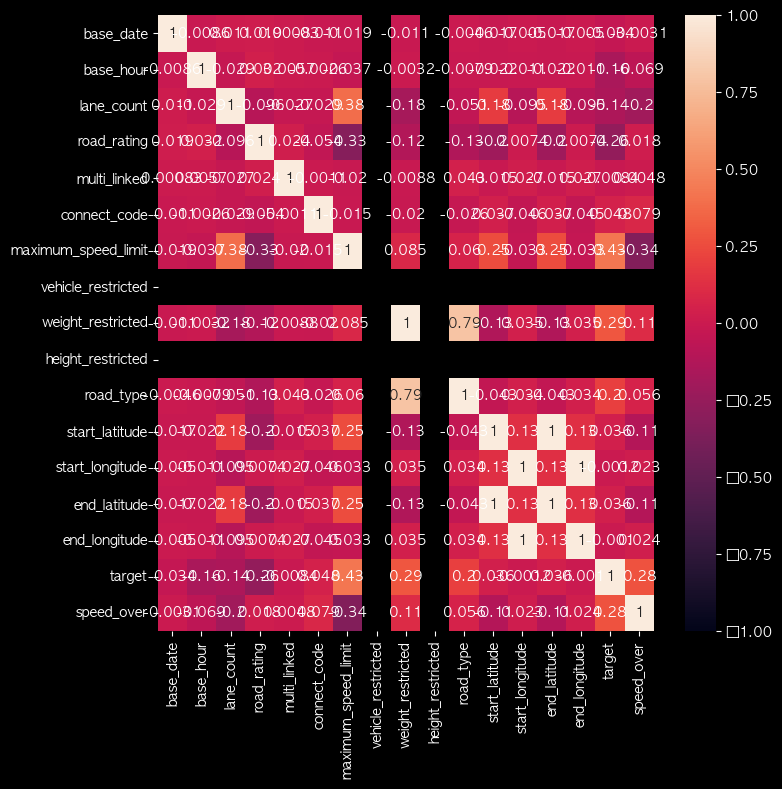

In [51]:
sns.heatmap(df_numerical.corr(), annot=True, vmax=1, vmin=-1)

plt.gcf().set_size_inches(8,8)


# road_type weight_restricted  maximum_speed_limit connect_code multi_linked

In [52]:
df_numerical['speed_over'].value_counts()

speed_over
0    4241412
1     459805
Name: count, dtype: int64

In [53]:
df_numerical.groupby(['speed_over'])['base_hour'].mean()

speed_over
0    12.081623
1    10.512935
Name: base_hour, dtype: float64

In [54]:
for i in df_numerical.columns:
    if i not in ['speed_over']:
        print('------------------------------------')
        print(df_numerical.groupby(['speed_over'])[i].mean())

# road_type weight_restricted  maximum_speed_limit connect_code multi_linked

------------------------------------
speed_over
0    2.021672e+07
1    2.021667e+07
Name: base_date, dtype: float64
------------------------------------
speed_over
0    12.081623
1    10.512935
Name: base_hour, dtype: float64
------------------------------------
speed_over
0    1.881281
1    1.424971
Name: lane_count, dtype: float64
------------------------------------
speed_over
0    104.947407
1    105.060821
Name: road_rating, dtype: float64
------------------------------------
speed_over
0    0.000442
1    0.000792
Name: multi_linked, dtype: float64
------------------------------------
speed_over
0    0.130844
1    1.512950
Name: connect_code, dtype: float64
------------------------------------
speed_over
0    62.597670
1    48.852253
Name: maximum_speed_limit, dtype: float64
------------------------------------
speed_over
0    0.0
1    0.0
Name: vehicle_restricted, dtype: float64
------------------------------------
speed_over
0     5127.650603
1    10148.755233
Name: weight_restr

In [55]:
df_numerical

base_date  base_hour  lane_count  road_rating  multi_linked  \
0         20220623         17           1          106             0   
1         20220728         21           2          103             0   
2         20211010          7           2          103             0   
3         20220311         13           2          107             0   
4         20211005          8           2          103             0   
...            ...        ...         ...          ...           ...   
4701212   20211104         16           1          107             0   
4701213   20220331          2           2          107             0   
4701214   20220613         22           2          103             0   
4701215   20211020          2           2          103             0   
4701216   20211019          6           2          107             0   

         connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0                 60.0                 0.0   
1                   0                 60.0                 0.0   
2                   0                 80.0                 0.0   
3                   0                 50.0                 0.0   
4                   0                 80.0                 0.0   
...               ...                  ...                 ...   
4701212             0                 50.0                 0.0   
4701213             0                 80.0                 0.0   
4701214             0                 60.0                 0.0   
4701215             0                 80.0                 0.0   
4701216             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type  start_latitude  \
0                  32400.0                0.0          3       33.427747   
1                      0.0                0.0          0       33.500730   
2                      0.0                0.0          0       33.279145   
3                      0.0                0.0          0       33.246081   
4                      0.0                0.0          0       33.462214   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0       33.422145   
4701213            43200.0                0.0          3       33.472505   
4701214                0.0                0.0          0       33.447183   
4701215                0.0                0.0          0       33.443596   
4701216                0.0                0.0          0       33.256785   

         start_longitude  end_latitude  end_longitude  target  speed_over  
0             126.662612     33.427749     126.662335    52.0           0  
1             126.529107     33.504811     126.526240    30.0           0  
2             126.368598     33.280072     126.362147    61.0           0  
3             126.567204     33.245565     126.566228    20.0           0  
4             126.326551     33.462677     126.330152    38.0           0  
...                  ...           ...            ...     ...         ...  
4701212       126.278125     33.420955     126.273750    20.0           0  
4701213       126.424368     33.472525     126.424890    65.0           0  
4701214       126.912579     33.444121     126.912948    30.0           0  
4701215       126.431817     33.444996     126.433332    73.0           0  
4701216       126.508940     33.257130     126.510364    35.0           0  

[4701217 rows x 17 columns]

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns= df_numerical.columns)

In [59]:
df_numerical_scaled

base_date  base_hour  lane_count  road_rating  multi_linked  \
0         0.857220   0.754498   -1.216503     0.566000     -0.021829   
1         0.880268   1.349551    0.237511    -1.064340     -0.021829   
2        -1.252880  -0.733134    0.237511    -1.064340     -0.021829   
3         0.788735   0.159445    0.237511     1.109446     -0.021829   
4        -1.253977  -0.584371    0.237511    -1.064340     -0.021829   
...            ...        ...         ...          ...           ...   
4701212  -1.232246   0.605735   -1.216503     1.109446     -0.021829   
4701213   0.793125  -1.476951    0.237511     1.109446     -0.021829   
4701214   0.855025   1.498314    0.237511    -1.064340     -0.021829   
4701215  -1.250685  -1.476951    0.237511    -1.064340     -0.021829   
4701216  -1.250904  -0.881898    0.237511     1.109446     -0.021829   

         connect_code  maximum_speed_limit  vehicle_restricted  \
0           -0.050886            -0.103292                 0.0   
1           -0.050886            -0.103292                 0.0   
2           -0.050886             1.545032                 0.0   
3           -0.050886            -0.927454                 0.0   
4           -0.050886             1.545032                 0.0   
...               ...                  ...                 ...   
4701212     -0.050886            -0.927454                 0.0   
4701213     -0.050886             1.545032                 0.0   
4701214     -0.050886            -0.103292                 0.0   
4701215     -0.050886             1.545032                 0.0   
4701216     -0.050886            -0.103292                 0.0   

         weight_restricted  height_restricted  road_type  start_latitude  \
0                 1.919331                0.0   1.968826        0.429152   
1                -0.402678                0.0  -0.507917        1.150320   
2                -0.402678                0.0  -0.507917       -1.039228   
3                -0.402678                0.0  -0.507917       -1.365944   
4                -0.402678                0.0  -0.507917        0.769731   
...                    ...                ...        ...             ...   
4701212          -0.402678                0.0  -0.507917        0.373791   
4701213           2.693334                0.0   1.968826        0.871416   
4701214          -0.402678                0.0  -0.507917        0.621200   
4701215          -0.402678                0.0  -0.507917        0.585761   
4701216          -0.402678                0.0  -0.507917       -1.260175   

         start_longitude  end_latitude  end_longitude    target  speed_over  
0               0.901272      0.429179       0.899511  0.577367   -0.329254  
1               0.047471      1.190706       0.029071 -0.801560   -0.329254  
2              -0.979027     -1.030152      -1.020437  1.141473   -0.329254  
3               0.291115     -1.371145       0.284828 -1.428346   -0.329254  
4              -1.247926      0.774335      -1.225076 -0.300132   -0.329254  
...                  ...           ...            ...       ...         ...  
4701212        -1.557627      0.362039      -1.585812 -1.428346   -0.329254  
4701213        -0.622360      0.871656      -0.619146  1.392187   -0.329254  
4701214         2.499876      0.590966       2.502387 -0.801560   -0.329254  
4701215        -0.574724      0.599615      -0.565155  1.893615   -0.329254  
4701216        -0.081499     -1.256864      -0.072470 -0.488168   -0.329254  

[4701217 rows x 17 columns]

<Axes: xlabel='target', ylabel='maximum_speed_limit'>

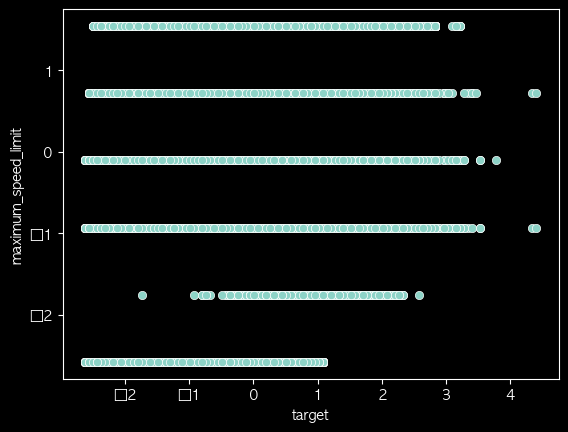

In [60]:
sns.scatterplot(data=df_numerical_scaled, x='target', y='maximum_speed_limit')

# Binary Prediction

In [61]:
df.head(5)

id  base_date day_of_week  base_hour  lane_count  road_rating  \
0  TRAIN_0000000   20220623           목         17           1          106   
1  TRAIN_0000001   20220728           목         21           2          103   
2  TRAIN_0000002   20211010           일          7           2          103   
3  TRAIN_0000003   20220311           금         13           2          107   
4  TRAIN_0000004   20211005           화          8           2          103   

   road_name  multi_linked  connect_code  maximum_speed_limit  \
0  지방도1112호선             0             0                 60.0   
1   일반국도11호선             0             0                 60.0   
2   일반국도16호선             0             0                 80.0   
3        태평로             0             0                 50.0   
4   일반국도12호선             0             0                 80.0   

   vehicle_restricted  weight_restricted  height_restricted  road_type  \
0                 0.0            32400.0                0.0          3   
1                 0.0                0.0                0.0          0   
2                 0.0                0.0                0.0          0   
3                 0.0                0.0                0.0          0   
4                 0.0                0.0                0.0          0   

  start_node_name  start_latitude  start_longitude start_turn_restricted  \
0           제3교래교       33.427747       126.662612                    없음   
1           광양사거리       33.500730       126.529107                    있음   
2            창고천교       33.279145       126.368598                    없음   
3           남양리조트       33.246081       126.567204                    없음   
4            애월샷시       33.462214       126.326551                    없음   

  end_node_name  end_latitude  end_longitude end_turn_restricted  target  \
0         제3교래교     33.427749     126.662335                  없음    52.0   
1        KAL사거리     33.504811     126.526240                  없음    30.0   
2          상창육교     33.280072     126.362147                  없음    61.0   
3          서현주택     33.245565     126.566228                  없음    20.0   
4          애월입구     33.462677     126.330152                  없음    38.0   

   speed_over  
0           0  
1           0  
2           0  
3           0  
4           0

In [62]:
df.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'speed_over'],
      dtype='object')

In [63]:
X = df[[ 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted']]

In [64]:
X

day_of_week  base_hour  lane_count  road_rating  road_name  \
0                 목         17           1          106  지방도1112호선   
1                 목         21           2          103   일반국도11호선   
2                 일          7           2          103   일반국도16호선   
3                 금         13           2          107        태평로   
4                 화          8           2          103   일반국도12호선   
...             ...        ...         ...          ...        ...   
4701212           목         16           1          107          -   
4701213           목          2           2          107          -   
4701214           월         22           2          103   일반국도12호선   
4701215           수          2           2          103   일반국도95호선   
4701216           화          6           2          107        경찰로   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0             0                 60.0                 0.0   
1                   0             0                 60.0                 0.0   
2                   0             0                 80.0                 0.0   
3                   0             0                 50.0                 0.0   
4                   0             0                 80.0                 0.0   
...               ...           ...                  ...                 ...   
4701212             0             0                 50.0                 0.0   
4701213             0             0                 80.0                 0.0   
4701214             0             0                 60.0                 0.0   
4701215             0             0                 80.0                 0.0   
4701216             0             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type start_node_name  \
0                  32400.0                0.0          3           제3교래교   
1                      0.0                0.0          0           광양사거리   
2                      0.0                0.0          0            창고천교   
3                      0.0                0.0          0           남양리조트   
4                      0.0                0.0          0            애월샷시   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0           대림사거리   
4701213            43200.0                0.0          3             광삼교   
4701214                0.0                0.0          0           고성교차로   
4701215                0.0                0.0          0           제6광령교   
4701216                0.0                0.0          0          서귀포경찰서   

         start_latitude  start_longitude start_turn_restricted end_node_name  \
0             33.427747       126.662612                    없음         제3교래교   
1             33.500730       126.529107                    있음        KAL사거리   
2             33.279145       126.368598                    없음          상창육교   
3             33.246081       126.567204                    없음          서현주택   
4             33.462214       126.326551                    없음          애월입구   
...                 ...              ...                   ...           ...   
4701212       33.422145       126.278125                    없음          금덕해운   
4701213       33.472505       126.424368                    없음           광삼교   
4701214       33.447183       126.912579                    없음         성산교차로   
4701215       33.443596       126.431817                    없음        관광대학입구   
4701216       33.256785       126.508940                    없음          시민공원   

         end_latitude  end_longitude end_turn_restricted  
0           33.427749     126.662335                  없음  
1           33.504811     126.526240                  없음  
2           33.280072     126.362147                  없음  
3           33.245565     126.566228                  없음  
4           33.462677     126.330152 

In [65]:
Y = df['speed_over']

In [332]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import shap
import tensorflow as tf

import xgboost as xgb
import lightgbm as lgb

## Label Encoder

In [67]:
categorical_list = []
numerical_list = []

for i in X.columns:
    if X[i].dtypes == 'O':
        categorical_list.append(i)


In [68]:
categorical_list

['day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [69]:
X_ohe = X.copy()

In [70]:
# np.array(X['end_node_name']).reshape(-1,1)

In [71]:
# ohe.fit_transform(np.array(X['end_node_name']).reshape(-1,1)).toarray()

In [72]:
# for i in categorical_list:
#     new  = pd.DataFrame(ohe.fit_transform(np.array(X[i]).reshape(-1,1)).toarray(), columns = ohe.get_feature_names_out([i]))
#     X_ohe = pd.concat([X_ohe, new], axis=1)
#     X_ohe.drop(i, axis=1, inplace=True)

In [73]:
le = LabelEncoder()

In [74]:
X_le = X.copy()

In [75]:
X_le

day_of_week  base_hour  lane_count  road_rating  road_name  \
0                 목         17           1          106  지방도1112호선   
1                 목         21           2          103   일반국도11호선   
2                 일          7           2          103   일반국도16호선   
3                 금         13           2          107        태평로   
4                 화          8           2          103   일반국도12호선   
...             ...        ...         ...          ...        ...   
4701212           목         16           1          107          -   
4701213           목          2           2          107          -   
4701214           월         22           2          103   일반국도12호선   
4701215           수          2           2          103   일반국도95호선   
4701216           화          6           2          107        경찰로   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0             0                 60.0                 0.0   
1                   0             0                 60.0                 0.0   
2                   0             0                 80.0                 0.0   
3                   0             0                 50.0                 0.0   
4                   0             0                 80.0                 0.0   
...               ...           ...                  ...                 ...   
4701212             0             0                 50.0                 0.0   
4701213             0             0                 80.0                 0.0   
4701214             0             0                 60.0                 0.0   
4701215             0             0                 80.0                 0.0   
4701216             0             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type start_node_name  \
0                  32400.0                0.0          3           제3교래교   
1                      0.0                0.0          0           광양사거리   
2                      0.0                0.0          0            창고천교   
3                      0.0                0.0          0           남양리조트   
4                      0.0                0.0          0            애월샷시   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0           대림사거리   
4701213            43200.0                0.0          3             광삼교   
4701214                0.0                0.0          0           고성교차로   
4701215                0.0                0.0          0           제6광령교   
4701216                0.0                0.0          0          서귀포경찰서   

         start_latitude  start_longitude start_turn_restricted end_node_name  \
0             33.427747       126.662612                    없음         제3교래교   
1             33.500730       126.529107                    있음        KAL사거리   
2             33.279145       126.368598                    없음          상창육교   
3             33.246081       126.567204                    없음          서현주택   
4             33.462214       126.326551                    없음          애월입구   
...                 ...              ...                   ...           ...   
4701212       33.422145       126.278125                    없음          금덕해운   
4701213       33.472505       126.424368                    없음           광삼교   
4701214       33.447183       126.912579                    없음         성산교차로   
4701215       33.443596       126.431817                    없음        관광대학입구   
4701216       33.256785       126.508940                    없음          시민공원   

         end_latitude  end_longitude end_turn_restricted  
0           33.427749     126.662335                  없음  
1           33.504811     126.526240                  없음  
2           33.280072     126.362147                  없음  
3           33.245565     126.566228                  없음  
4           33.462677     126.330152 

In [76]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
4701212    0
4701213    0
4701214    0
4701215    0
4701216    0
Name: speed_over, Length: 4701217, dtype: int64

In [77]:
x_sampled, _, y_sampled, _ = train_test_split(X_le, Y, test_size=0.9)


In [78]:
x_sampled, _, y_sampled, _ = train_test_split(x_sampled, y_sampled, test_size=0.9)


In [79]:
for i in categorical_list:
    le.fit(x_sampled[i])
    x_sampled[i] = le.transform(x_sampled[i])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.3, random_state=42)

In [81]:
x_train

day_of_week  base_hour  lane_count  road_rating  road_name  \
2295033            6         21           2          103         37   
235629             3          9           2          107          0   
1131526            6          1           1          106         50   
2783344            4         19           2          103         35   
3200922            5         10           2          103         35   
...              ...        ...         ...          ...        ...   
1778172            0          8           1          106         46   
4677826            3          7           2          103         35   
762357             1          6           1          106         51   
2992606            6         18           2          107          0   
4224195            5         22           2          103         37   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
2295033             0             0                 80.0                 0.0   
235629              0             0                 50.0                 0.0   
1131526             0             0                 60.0                 0.0   
2783344             0             0                 80.0                 0.0   
3200922             0             0                 80.0                 0.0   
...               ...           ...                  ...                 ...   
1778172             0             0                 60.0                 0.0   
4677826             0             0                 70.0                 0.0   
762357              0             0                 60.0                 0.0   
2992606             0             0                 80.0                 0.0   
4224195             0             0                 80.0                 0.0   

         weight_restricted  height_restricted  road_type  start_node_name  \
2295033                0.0                0.0          0               19   
235629                 0.0                0.0          0               44   
1131526                0.0                0.0          0              388   
2783344                0.0                0.0          0               70   
3200922                0.0                0.0          0               70   
...                    ...                ...        ...              ...   
1778172                0.0                0.0          0              159   
4677826                0.0                0.0          0              468   
762357                 0.0                0.0          0              250   
2992606                0.0                0.0          0              471   
4224195                0.0                0.0          0               18   

         start_latitude  start_longitude  start_turn_restricted  \
2295033       33.433794       126.420435                      0   
235629        33.287997       126.739326                      0   
1131526       33.430993       126.674168                      0   
2783344       33.279883       126.685954                      0   
3200922       33.279883       126.685954                      0   
...                 ...              ...                    ...   
1778172       33.496623       126.812152                      0   
4677826       33.250640       126.308215                      0   
762357        33.394373       126.800979                      0   
2992606       33.466607       126.454022                      0   
4224195       33.439569       126.428087                      0   

         end_node_name  end_latitude  end_longitude  end_turn_restricted  
2295033            385     33.436550     126.423971                    0  
235629             117     33.289003     126.744291                    0  
1131526             36     33.433558     126.672298                    0  
2783344            106     33.278168     126.667651                    0  
3200922            229     33.281563     126.703140                    1  
...            

In [82]:
# for i in categorical_list:
#     le.fit(X_le[i])
#     X_le[i] = le.transform(X_le[i])


In [83]:
# x_train, x_test, y_train, y_test = train_test_split(X_le, Y, test_size=0.2)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [85]:
from sklearn.neighbors import KNeighborsClassifier


In [86]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score

In [87]:
from sklearn.metrics import precision_recall_curve

In [88]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [89]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
# y_pred_train = knn.predict(x_train)
# y_pred_test = knn.predict(x_test)



In [91]:
# print(classification_report(y_test, y_pred_test))

In [92]:
rf_c = RandomForestClassifier()

In [93]:
rf_c.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_train = rf_c.predict(x_train)
y_pred_test = rf_c.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix

## Model Comparison

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29665
           1       0.97      0.97      0.97      3243

    accuracy                           0.99     32908
   macro avg       0.98      0.98      0.98     32908
weighted avg       0.99      0.99      0.99     32908

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12634
           1       0.80      0.73      0.76      1470

    accuracy                           0.95     14104
   macro avg       0.88      0.86      0.87     14104
weighted avg       0.95      0.95      0.95     14104



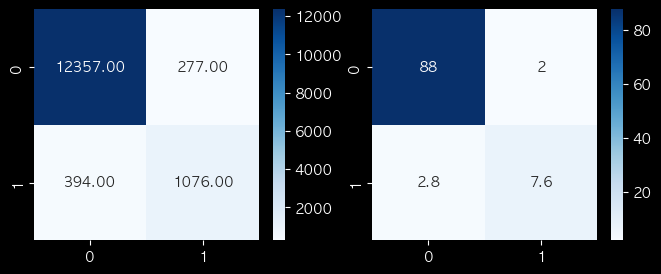

base_hour                0.203377
maximum_speed_limit      0.142689
day_of_week              0.100145
end_longitude            0.089858
start_longitude          0.089242
start_latitude           0.085297
end_latitude             0.079382
end_node_name            0.050993
road_name                0.049901
start_node_name          0.049617
lane_count               0.017742
weight_restricted        0.015467
road_rating              0.014639
road_type                0.005789
connect_code             0.002779
start_turn_restricted    0.001845
end_turn_restricted      0.001169
multi_linked             0.000067
vehicle_restricted       0.000000
height_restricted        0.000000
dtype: float64


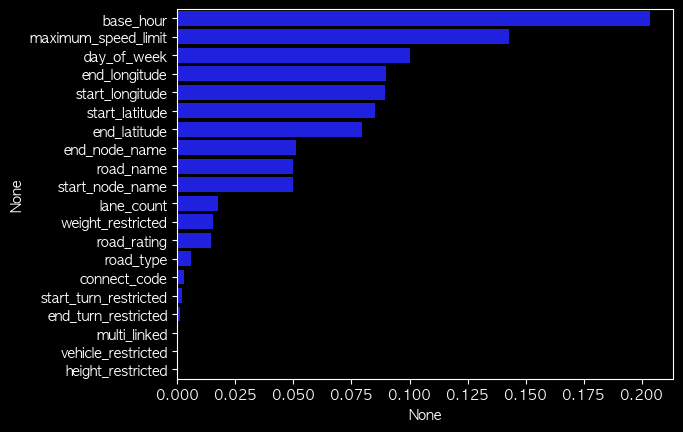

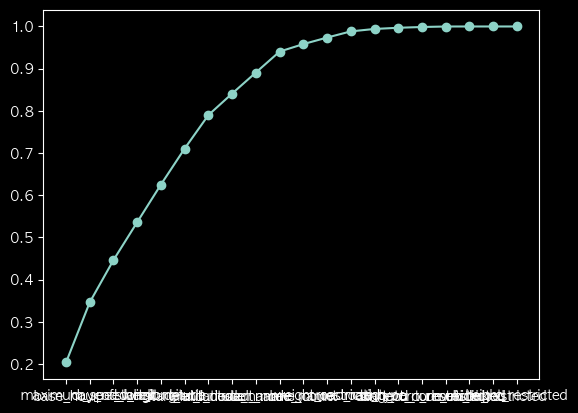

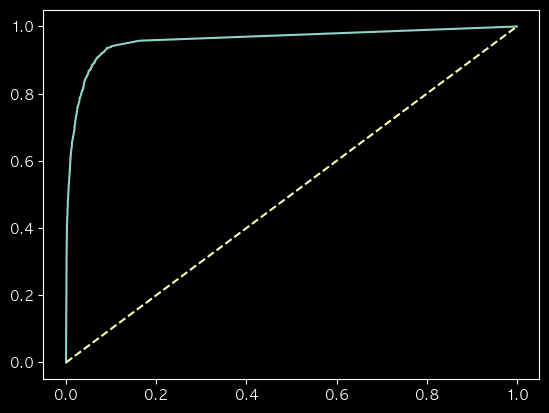

auc_score score
0.8550239123669098
     precision    recall   f1score  thresholds
0     0.104226  1.000000  0.188776    0.000000
1     0.401483  0.957823  0.565803    0.001667
2     0.401597  0.957823  0.565916    0.002000
3     0.401712  0.957823  0.566030    0.002500
4     0.402746  0.957823  0.567056    0.003333
..         ...       ...       ...         ...
640   0.970270  0.244218  0.390217    0.996667
641   0.970190  0.243537  0.389342    0.997500
642   0.970027  0.242177  0.387588    0.998000
643   0.969780  0.240136  0.384951    1.000000
644   1.000000  0.000000  0.000000    1.000000

[645 rows x 4 columns]


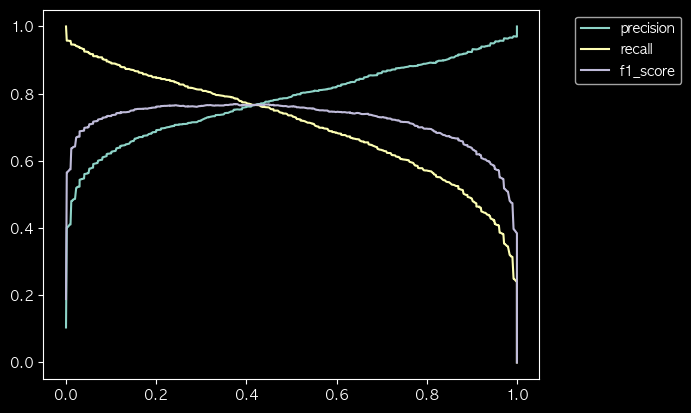

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12634
           1       0.72      0.81      0.76      1470

    accuracy                           0.95     14104
   macro avg       0.85      0.89      0.87     14104
weighted avg       0.95      0.95      0.95     14104



In [96]:
y_pred_train = rf_c.predict(x_train)
y_pred_test = rf_c.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


cf = confusion_matrix(y_test, y_pred_test)
cf_ratio = (cf / cf.sum())*100

figs, axes = plt.subplots(1,2, figsize=(8,3))
sns.heatmap(cf, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
sns.heatmap(cf_ratio, cmap='Blues', annot=True, ax=axes[1])
plt.show()


top20 = pd.Series(rf_c.feature_importances_, x_train.columns)
top20 = top20.sort_values(ascending=False)
print(top20)

sns.barplot(x=top20, y=top20.index, color='Blue')
plt.show()


plt.plot(pd.DataFrame(top20).cumsum(), marker='o')
plt.show()


y_pred_train_proba = rf_c.predict_proba(x_train)[:,1]
y_pred_test_proba = rf_c.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_pred_test_proba)

plt.plot(fprs, tprs)
plt.plot([0,1], [0,1], '--')
plt.show()

print('auc_score score')
print(roc_auc_score(y_test, y_pred_test))


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_proba)

thresholds = np.append(thresholds, 1)

f1_score = 2*(1/(1/precision + 1/recall))

pr_rc_df = pd.DataFrame({'precision' :precision, 'recall' : recall, 'f1score':f1_score ,'thresholds' :thresholds})
print(pr_rc_df)


plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, f1_score, label='f1_score')



plt.legend(loc= 'upper right', bbox_to_anchor=(1.3,1))
plt.show()


a=0.3
y_pred_test = np.where(y_pred_test_proba > a , 1, 0)

print(classification_report(y_test, y_pred_test))

In [97]:
from sklearn.model_selection import KFold, cross_val_score

In [98]:
try:
    def model_check(model):
            model.fit(x_train, y_train)
            y_pred_train = model.predict(x_train)
            y_pred_test = model.predict(x_test)

            print(classification_report(y_train, y_pred_train))
            print(classification_report(y_test, y_pred_test))


            cf = confusion_matrix(y_test, y_pred_test)
            cf_ratio = (cf / cf.sum())*100

            figs, axes = plt.subplots(1,2, figsize=(8,3))
            sns.heatmap(cf, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
            sns.heatmap(cf_ratio, cmap='Blues', annot=True, ax=axes[1])
            plt.show()

            
            kfold = KFold(n_splits=5)
            cross_val = cross_val_score(model, x_train, y_train, cv=kfold)

            print(cross_val)
            print(cross_val.mean())




            print('accuracy_score')
            print(accuracy_score(y_test, y_pred_test))


            top20 = pd.Series(model.feature_importances_, x_train.columns)
            top20 = top20.sort_values(ascending=False)
            print(top20)

            sns.barplot(x=top20, y=top20.index, color='Blue')
            plt.xticks(rotation=45)
            plt.show()


            plt.plot(pd.DataFrame(top20).cumsum(), marker='o')
            plt.show()


            y_pred_train_proba = model.predict_proba(x_train)[:,1]
            y_pred_test_proba = model.predict_proba(x_test)[:,1]

            fprs, tprs, thresholds = roc_curve(y_test, y_pred_test_proba)

            plt.plot(fprs, tprs)
            plt.plot([0,1], [0,1], '--')
            plt.show()

            print('auc_score score')
            print(roc_auc_score(y_test, y_pred_test))


            precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_proba)

            thresholds = np.append(thresholds, 1)

            # accuracies = []
            # for i in thresholds:
            #     y_pred_accuracy = np.where(y_pred_test_proba >= i, 1, 0)
            #     accuracies.append(accuracy_score(y_test, y_pred_accuracy))

            # print(accuracies)


            f1_score = 2*(1/(1/precision + 1/recall))

            pr_rc_df = pd.DataFrame({'precision' :precision, 'recall' : recall, 'f1score': f1_score ,'thresholds' :thresholds})
            print(pr_rc_df)


            # plt.plot(thresholds, accuracies, 'accuracies')
            plt.plot(thresholds, precision, label='precision')
            plt.plot(thresholds, recall, label='recall')
            plt.plot(thresholds, f1_score, label='f1_score')

            plt.legend(loc= 'upper right', bbox_to_anchor=(1.3,1))
            plt.show()


            a=0.3
            y_pred_test = np.where(y_pred_test_proba > a , 1, 0)

            print(classification_report(y_test, y_pred_test))



except Exception as e:
    print(e)




In [99]:
gb_c  = GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29665
           1       0.87      0.56      0.68      3243

    accuracy                           0.95     32908
   macro avg       0.91      0.78      0.83     32908
weighted avg       0.95      0.95      0.94     32908

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12634
           1       0.89      0.56      0.69      1470

    accuracy                           0.95     14104
   macro avg       0.92      0.78      0.83     14104
weighted avg       0.94      0.95      0.94     14104



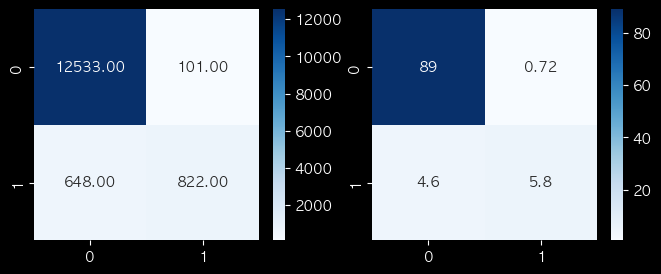

[0.95062291 0.94257065 0.94728046 0.94696855 0.94256192]
0.9460008973098297
accuracy_score
0.9468944980147476
maximum_speed_limit      0.316517
end_longitude            0.171029
start_longitude          0.104505
road_name                0.097422
start_latitude           0.089455
end_latitude             0.084822
end_node_name            0.031168
base_hour                0.028522
road_rating              0.027959
weight_restricted        0.025158
start_node_name          0.013431
lane_count               0.008384
connect_code             0.000651
road_type                0.000543
day_of_week              0.000433
height_restricted        0.000000
start_turn_restricted    0.000000
vehicle_restricted       0.000000
multi_linked             0.000000
end_turn_restricted      0.000000
dtype: float64


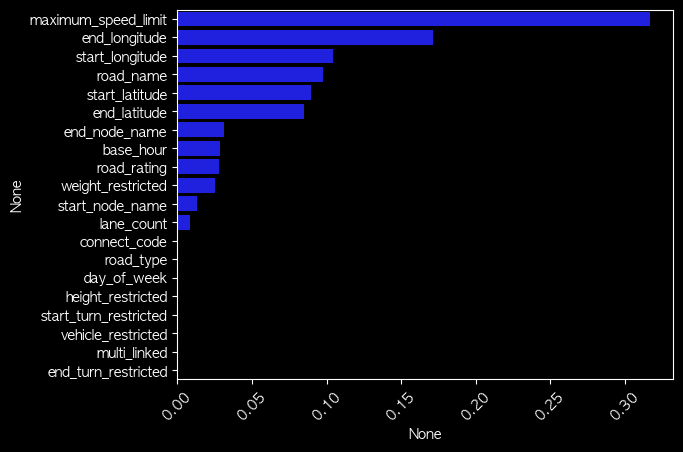

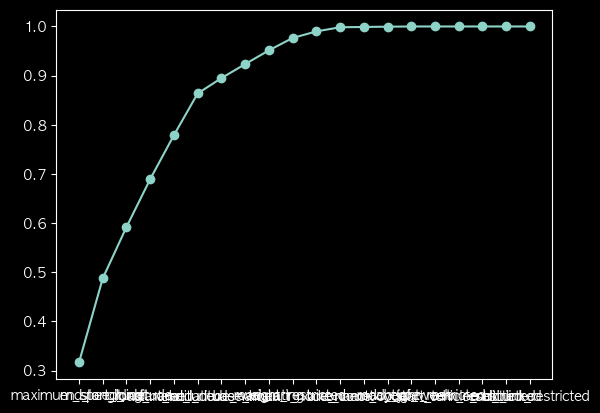

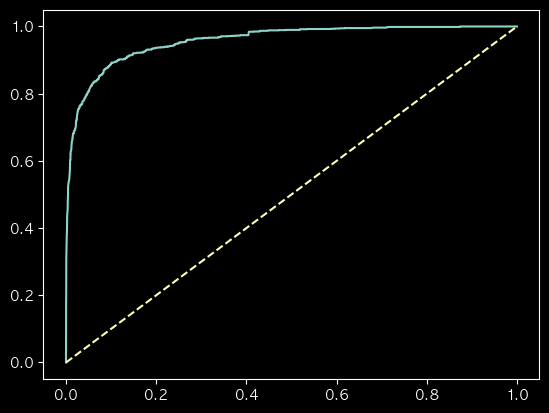

auc_score score
0.7755946861885487
      precision    recall   f1score  thresholds
0      0.104226  1.000000  0.188776    0.003505
1      0.104248  1.000000  0.188813    0.003553
2      0.104263  1.000000  0.188837    0.003560
3      0.104278  1.000000  0.188861    0.003613
4      0.104381  1.000000  0.189031    0.003660
...         ...       ...       ...         ...
3153   1.000000  0.006122  0.012170    0.966429
3154   1.000000  0.003401  0.006780    0.966452
3155   1.000000  0.002721  0.005427    0.969322
3156   1.000000  0.001361  0.002717    0.970795
3157   1.000000  0.000000  0.000000    1.000000

[3158 rows x 4 columns]


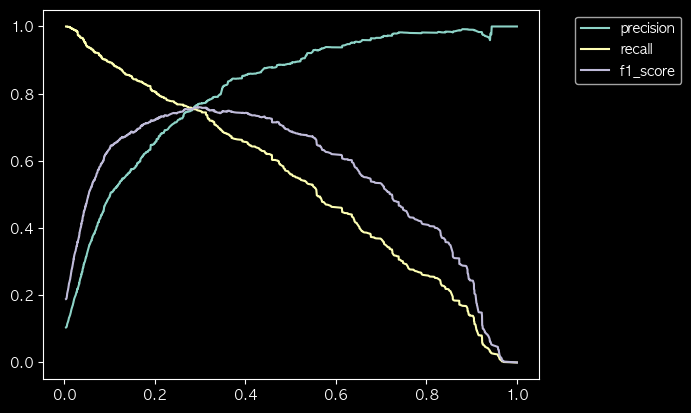

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     12634
           1       0.77      0.75      0.76      1470

    accuracy                           0.95     14104
   macro avg       0.87      0.86      0.87     14104
weighted avg       0.95      0.95      0.95     14104



In [100]:
model_check(gb_c)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()

In [103]:
# model_check(lr)

In [104]:
xgb_c = xgb.XGBClassifier()
lgb_c = lgb.LGBMClassifier()

In [105]:
# model_check(lgb_c)

In [106]:
df


id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29665
           1       0.89      0.82      0.85      3243

    accuracy                           0.97     32908
   macro avg       0.93      0.91      0.92     32908
weighted avg       0.97      0.97      0.97     32908

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     12634
           1       0.84      0.75      0.79      1470

    accuracy                           0.96     14104
   macro avg       0.91      0.87      0.88     14104
weighted avg       0.96      0.96      0.96     14104



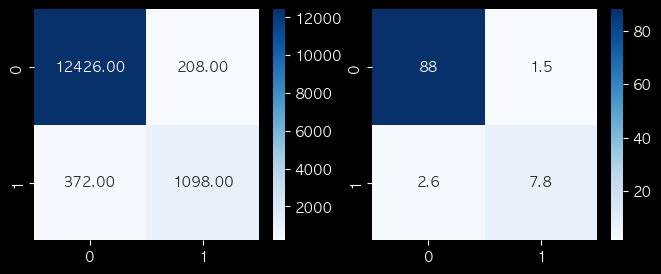

[0.9603464  0.95700395 0.95442115 0.96018842 0.95517399]
0.9574267809907908
accuracy_score
0.9588769143505389
maximum_speed_limit      0.281247
end_longitude            0.097635
road_name                0.085244
weight_restricted        0.077953
lane_count               0.067140
road_rating              0.063909
end_latitude             0.060355
start_latitude           0.060228
start_longitude          0.052595
road_type                0.035177
end_node_name            0.027774
start_node_name          0.025582
start_turn_restricted    0.020613
end_turn_restricted      0.015351
base_hour                0.015128
day_of_week              0.007133
connect_code             0.004243
multi_linked             0.002692
vehicle_restricted       0.000000
height_restricted        0.000000
dtype: float32


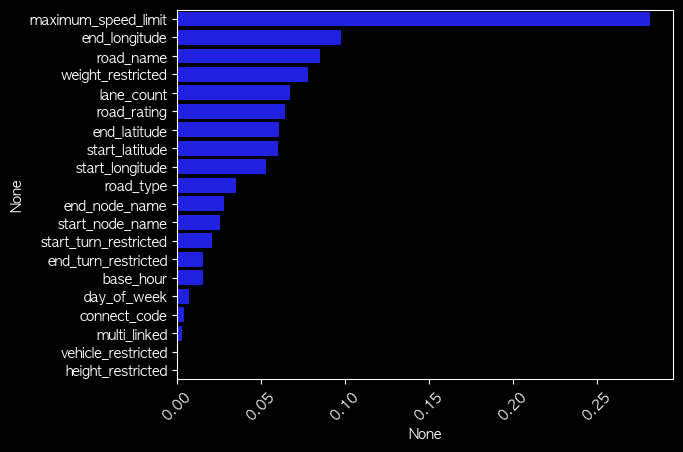

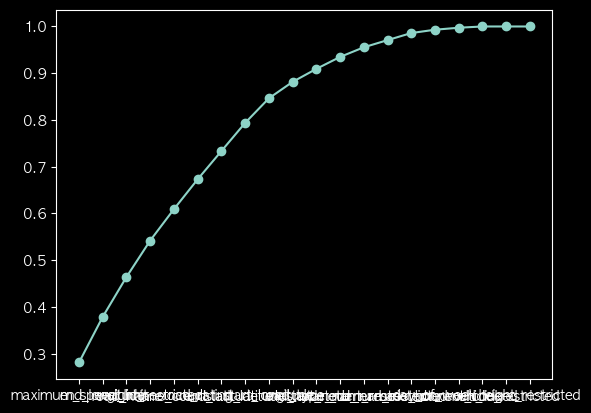

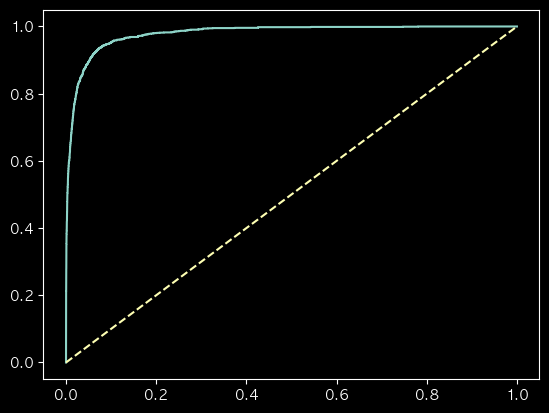

auc_score score
0.8652376321749216
       precision    recall   f1score    thresholds
0       0.104226  1.000000  0.188776  3.562291e-07
1       0.104233  1.000000  0.188788  4.193271e-07
2       0.104241  1.000000  0.188800  5.186454e-07
3       0.104248  1.000000  0.188813  5.187834e-07
4       0.104255  1.000000  0.188825  7.107338e-07
...          ...       ...       ...           ...
13059   1.000000  0.003401  0.006780  9.987561e-01
13060   1.000000  0.002721  0.005427  9.988775e-01
13061   1.000000  0.002041  0.004073  9.990004e-01
13062   1.000000  0.001361  0.002717  9.991008e-01
13063   1.000000  0.000000  0.000000  1.000000e+00

[13064 rows x 4 columns]


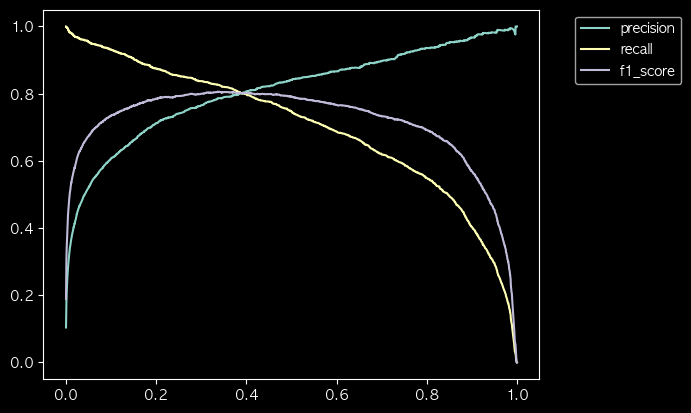

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12634
           1       0.77      0.84      0.80      1470

    accuracy                           0.96     14104
   macro avg       0.87      0.90      0.89     14104
weighted avg       0.96      0.96      0.96     14104



In [107]:
model_check(xgb_c)

In [108]:
# model_check(lgb_c)

In [109]:
df

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

In [110]:
x_train

day_of_week  base_hour  lane_count  road_rating  road_name  \
2295033            6         21           2          103         37   
235629             3          9           2          107          0   
1131526            6          1           1          106         50   
2783344            4         19           2          103         35   
3200922            5         10           2          103         35   
...              ...        ...         ...          ...        ...   
1778172            0          8           1          106         46   
4677826            3          7           2          103         35   
762357             1          6           1          106         51   
2992606            6         18           2          107          0   
4224195            5         22           2          103         37   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
2295033             0             0                 80.0                 0.0   
235629              0             0                 50.0                 0.0   
1131526             0             0                 60.0                 0.0   
2783344             0             0                 80.0                 0.0   
3200922             0             0                 80.0                 0.0   
...               ...           ...                  ...                 ...   
1778172             0             0                 60.0                 0.0   
4677826             0             0                 70.0                 0.0   
762357              0             0                 60.0                 0.0   
2992606             0             0                 80.0                 0.0   
4224195             0             0                 80.0                 0.0   

         weight_restricted  height_restricted  road_type  start_node_name  \
2295033                0.0                0.0          0               19   
235629                 0.0                0.0          0               44   
1131526                0.0                0.0          0              388   
2783344                0.0                0.0          0               70   
3200922                0.0                0.0          0               70   
...                    ...                ...        ...              ...   
1778172                0.0                0.0          0              159   
4677826                0.0                0.0          0              468   
762357                 0.0                0.0          0              250   
2992606                0.0                0.0          0              471   
4224195                0.0                0.0          0               18   

         start_latitude  start_longitude  start_turn_restricted  \
2295033       33.433794       126.420435                      0   
235629        33.287997       126.739326                      0   
1131526       33.430993       126.674168                      0   
2783344       33.279883       126.685954                      0   
3200922       33.279883       126.685954                      0   
...                 ...              ...                    ...   
1778172       33.496623       126.812152                      0   
4677826       33.250640       126.308215                      0   
762357        33.394373       126.800979                      0   
2992606       33.466607       126.454022                      0   
4224195       33.439569       126.428087                      0   

         end_node_name  end_latitude  end_longitude  end_turn_restricted  
2295033            385     33.436550     126.423971                    0  
235629             117     33.289003     126.744291                    0  
1131526             36     33.433558     126.672298                    0  
2783344            106     33.278168     126.667651                    0  
3200922            229     33.281563     126.703140                    1  
...            

In [111]:
# pip install --upgrade tensorflow



In [112]:
# import tensorflow as tf

# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [113]:

# from tensorflow.keras.callbacks import EarlyStopping




# tf_c = tf.keras.Sequential([
#     tf.keras.layers.Dense(32, activation='relu',input_dim=x_train.shape[1]),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# tf_c.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# tf_c.fit(x_train, y_train, epochs=10, batch_size=100,validation_data=(x_test, y_test), callbacks=[es] )








## Shap

In [114]:
import shap

In [115]:
# explainer = shap.Explainer(rf_c)

# shap_values = explainer.shap_values(x_train)

In [116]:
shap.summary_plot(shap_values[1], x_train, plot_type='dot')

# Show the plot
plt.show()

# shap.dependence_plot('base_hour', shap_values, x_train)
# plt.show()

# shap.waterfall_plot(
#     shap.Explanation(
#         values = shap_values[1],
#         base_values = explainer.expected_value,
#         data =x_train.iloc[1],
#         feature_names =  x_train.columns
#     )
# )
# plt.show()


NameError: name 'shap_values' is not defined

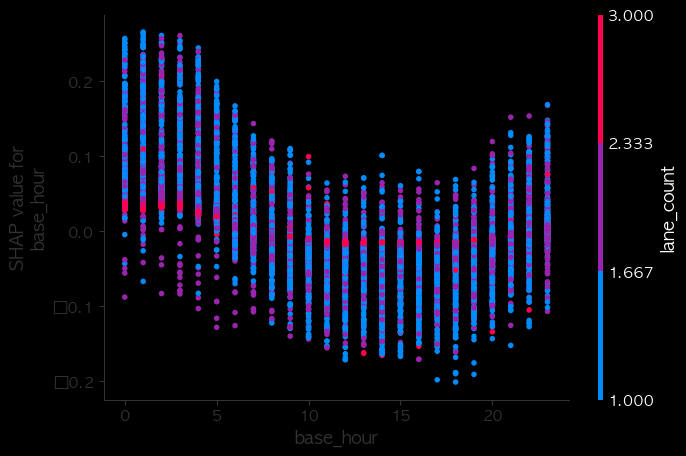

In [ ]:
shap.dependence_plot('base_hour', shap_values[1], x_train)

In [ ]:
explainer.expected_value[1]

0.09837273611279929

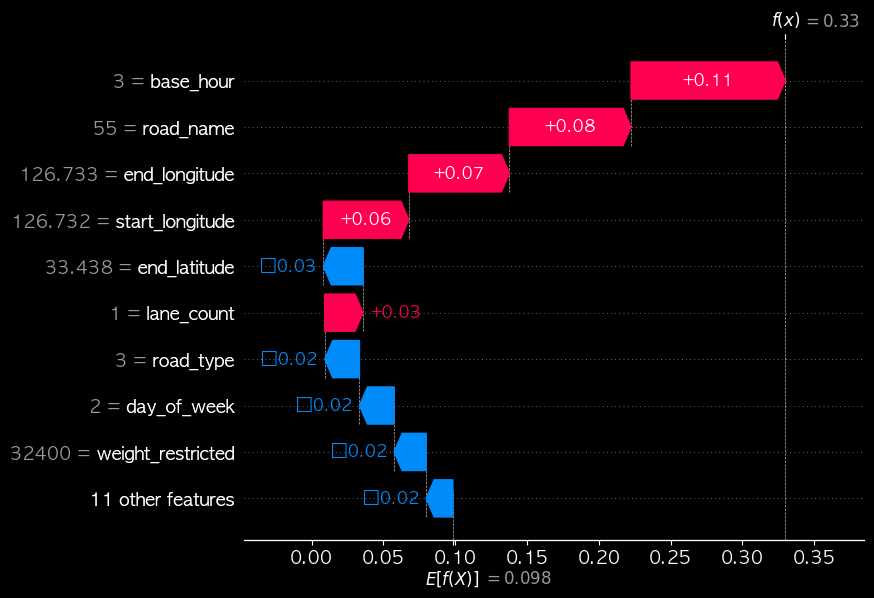

In [ ]:
shap_explanation = shap.Explanation(
    values=shap_values[1][1],
    base_values=explainer.expected_value[1],
    data=x_train.iloc[1],
    feature_names=x_train.columns
)

# Generate the waterfall plot
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

In [ ]:
y_train.value_counts()

3243/ (3243+29665)

0.09854746566184515

In [ ]:
X_ohe

day_of_week  base_hour  lane_count  road_rating  road_name  \
0                 목         17           1          106  지방도1112호선   
1                 목         21           2          103   일반국도11호선   
2                 일          7           2          103   일반국도16호선   
3                 금         13           2          107        태평로   
4                 화          8           2          103   일반국도12호선   
...             ...        ...         ...          ...        ...   
4701212           목         16           1          107          -   
4701213           목          2           2          107          -   
4701214           월         22           2          103   일반국도12호선   
4701215           수          2           2          103   일반국도95호선   
4701216           화          6           2          107        경찰로   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
0                   0             0                 60.0                 0.0   
1                   0             0                 60.0                 0.0   
2                   0             0                 80.0                 0.0   
3                   0             0                 50.0                 0.0   
4                   0             0                 80.0                 0.0   
...               ...           ...                  ...                 ...   
4701212             0             0                 50.0                 0.0   
4701213             0             0                 80.0                 0.0   
4701214             0             0                 60.0                 0.0   
4701215             0             0                 80.0                 0.0   
4701216             0             0                 60.0                 0.0   

         weight_restricted  height_restricted  road_type start_node_name  \
0                  32400.0                0.0          3           제3교래교   
1                      0.0                0.0          0           광양사거리   
2                      0.0                0.0          0            창고천교   
3                      0.0                0.0          0           남양리조트   
4                      0.0                0.0          0            애월샷시   
...                    ...                ...        ...             ...   
4701212                0.0                0.0          0           대림사거리   
4701213            43200.0                0.0          3             광삼교   
4701214                0.0                0.0          0           고성교차로   
4701215                0.0                0.0          0           제6광령교   
4701216                0.0                0.0          0          서귀포경찰서   

         start_latitude  start_longitude start_turn_restricted end_node_name  \
0             33.427747       126.662612                    없음         제3교래교   
1             33.500730       126.529107                    있음        KAL사거리   
2             33.279145       126.368598                    없음          상창육교   
3             33.246081       126.567204                    없음          서현주택   
4             33.462214       126.326551                    없음          애월입구   
...                 ...              ...                   ...           ...   
4701212       33.422145       126.278125                    없음          금덕해운   
4701213       33.472505       126.424368                    없음           광삼교   
4701214       33.447183       126.912579                    없음         성산교차로   
4701215       33.443596       126.431817                    없음        관광대학입구   
4701216       33.256785       126.508940                    없음          시민공원   

         end_latitude  end_longitude end_turn_restricted  
0           33.427749     126.662335                  없음  
1           33.504811     126.526240                  없음  
2           33.280072     126.362147                  없음  
3           33.245565     126.566228                  없음  
4           33.462677     126.330152 

In [ ]:
x_train

day_of_week  base_hour  lane_count  road_rating  road_name  \
178660             4         11           1          103         36   
670215             2          3           1          106         55   
3936631            6          4           2          107         11   
4232251            1          3           1          103         34   
1565789            0          2           3          103         35   
...              ...        ...         ...          ...        ...   
4121802            1         16           3          103         35   
2773467            1         15           2          103         35   
2475352            5         21           1          106         50   
1276962            2         10           1          106         52   
1345039            5          1           1          107         42   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
178660              0             0                 50.0                 0.0   
670215              0             0                 60.0                 0.0   
3936631             0             0                 50.0                 0.0   
4232251             0             0                 60.0                 0.0   
1565789             0             0                 70.0                 0.0   
...               ...           ...                  ...                 ...   
4121802             0             0                 70.0                 0.0   
2773467             0             0                 80.0                 0.0   
2475352             0             0                 50.0                 0.0   
1276962             0             0                 60.0                 0.0   
1345039             0             0                 50.0                 0.0   

         weight_restricted  height_restricted  road_type  start_node_name  \
178660             32400.0                0.0          3              335   
670215             32400.0                0.0          3               82   
3936631                0.0                0.0          0              115   
4232251                0.0                0.0          0              110   
1565789                0.0                0.0          0              105   
...                    ...                ...        ...              ...   
4121802                0.0                0.0          0              351   
2773467                0.0                0.0          0              150   
2475352            32400.0                0.0          3              388   
1276962                0.0                0.0          0               69   
1345039                0.0                0.0          0              161   

         start_latitude  start_longitude  start_turn_restricted  \
178660        33.260178       126.490345                      0   
670215        33.438329       126.732032                      0   
3936631       33.254628       126.567678                      0   
4232251       33.369081       126.625053                      0   
1565789       33.503254       126.534803                      0   
...                 ...              ...                    ...   
4121802       33.507384       126.540331                      1   
2773467       33.480864       126.398882                      0   
2475352       33.430742       126.674333                      0   
1276962       33.318746       126.247148                      0   
1345039       33.255215       126.414236                      0   

         end_node_name  end_latitude  end_longitude  end_turn_restricted  
178660             336     33.260224     126.490105                    0  
670215              81     33.437946     126.732509                    0  
3936631            190     33.252598     126.567765                    0  
4232251            344     33.348691     126.614599                    0  
1565789            133     33.504059     126.536446                    1  
...            

In [ ]:
y_train.value_counts()




speed_over
0    29679
1     3229
Name: count, dtype: int64

# Regression Mdoel 

In [24]:
df

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  vehicle_restricted  weight_restricted  \
0                       60.0                 0.0            32400.0   
1                       60.0                 0.0                0.0   
2                       80.0                 0.0                0.0   
3                       50.0                 0.0                0.0   
4                       80.0                 0.0                0.0   
...                      ...                 ...                ...   
4701212                 50.0                 0.0                0.0   
4701213                 80.0                 0.0            43200.0   
4701214                 60.0                 0.0                0.0   
4701215                 80.0                 0.0                0.0   
4701216                 60.0                 0.0                0.0   

         height_restricted  road_type start_node_name  start_latitude  \
0                      0.0          3           제3교래교       33.427747   
1                      0.0          0           광양사거리       33.500730   
2                      0.0          0            창고천교       33.279145   
3                      0.0          0           남양리조트       33.246081   
4                      0.0          0            애월샷시       33.462214   
...                    ...        ...             ...             ...   
4701212                0.0          0           대림사거리       33.422145   
4701213                0.0          3             광삼교       33.472505   
4701214                0.0          0           고성교차로       33.447183   
4701215                0.0          0           제6광령교       33.443596   
4701216                0.0          0          서귀포경찰서       33.256785   

         start_longitude start_turn_restricted end_node_name  end_latitude  \
0             126.662612                    없음         제3교래교     33.427749   
1             126.529107                    있음        KAL사거리     33.504811   
2             126.368598                    없음          상창육교     33.280072   
3             126.567204                    없음          서현주택     33.245565   
4             126.326551                    없음          애월입구     33.462677   
...                  ...                   ...           ...           ...   
4701212       126.278125                    없음          금덕해운     33.420955   
4701213       126.424368                    

In [25]:
df.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [28]:
df['target'].mean(), df['target'].std()

(42.78844180134633, 15.954433825018963)

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
ohe = OneHotEncoder()

In [33]:
df.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [62]:
X = df[[ 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted']]

In [63]:
X.dtypes

base_date                  int64
day_of_week               object
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
dtype: object

In [64]:
df[['target']]

target
0          52.0
1          30.0
2          61.0
3          20.0
4          38.0
...         ...
4701212    20.0
4701213    65.0
4701214    30.0
4701215    73.0
4701216    35.0

[4701217 rows x 1 columns]

In [178]:
Y = df['target']

In [66]:
X.shape


(4701217, 21)

In [208]:
X_sampled, _, Y_sampled, _ = train_test_split(X, Y, test_size=0.9, random_state=42)

In [209]:
X_sampled

base_date day_of_week  base_hour  lane_count  road_rating  road_name  \
4061211   20220225           금         18           1          107      관광단지로   
993008    20210902           목         16           2          107          -   
2911107   20220530           월         12           1          107        애원로   
4693967   20211222           수         18           2          107        연동로   
832087    20220513           금         18           1          106  지방도1115호선   
...            ...         ...        ...         ...          ...        ...   
1136074   20220620           월         19           2          107          -   
1570006   20220117           월         21           2          107        삼무로   
2234489   20220106           목          5           2          103   일반국도12호선   
4304572   20220711           월         14           3          106  지방도1132호선   
1692743   20210915           수         13           2          103   일반국도12호선   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
4061211             0             0                 30.0                 0.0   
993008              0             0                 80.0                 0.0   
2911107             0             0                 50.0                 0.0   
4693967             0             0                 50.0                 0.0   
832087              0             0                 60.0                 0.0   
...               ...           ...                  ...                 ...   
1136074             0             0                 50.0                 0.0   
1570006             0             0                 50.0                 0.0   
2234489             0             0                 60.0                 0.0   
4304572             0             0                 70.0                 0.0   
1692743             0             0                 70.0                 0.0   

         weight_restricted  height_restricted  road_type  start_node_name  \
4061211                0.0                0.0          0            산신주유소   
993008                 0.0                0.0          0              해안교   
2911107                0.0                0.0          0            납읍교차로   
4693967                0.0                0.0          0             흘천5교   
832087             43200.0                0.0          3            제5산록교   
...                    ...                ...        ...              ...   
1136074                0.0                0.0          0            광평교차로   
1570006                0.0                0.0          0          삼무공원사거리   
2234489                0.0                0.0          0             안덕계곡   
4304572                0.0                0.0          3  제주시 삼양2동 2186-1   
1692743                0.0                0.0          0            세훈빌리지   

         start_latitude  start_longitude start_turn_restricted end_node_name  \
4061211       33.255215       126.414236                    없음        관광단지입구   
993008        33.466607       126.454022                    없음           해안교   
2911107       33.429389       126.352388                    없음           납읍리   
4693967       33.485975       126.486409                    없음       그랜드호텔사거   
832087        33.291731       126.504396                    없음         제5산록교   
...                 ...              ...                   ...           ...   
1136074       33.330822       126.354179                    없음            금악   
1570006       33.489940       126.490153                    없음       제주일보사거리   
2234489       33.259898       126.356370                    없음           남당동   
4304572       33.521264       126.581398                    있음        삼양동사무소   
1692743       33.257978       126.428442                    없음          회수입구   

         end_latitude  end_longitude end_turn_restricted  
4061211     33.258119     126.415840                  없음  
993008      33.466433     126.454583                  없음  
2911107     

In [210]:
Y_sampled

4061211    29.0
993008     44.0
2911107    47.0
4693967    13.0
832087     55.0
           ... 
1136074    61.0
1570006    16.0
2234489    45.0
4304572    24.0
1692743    36.0
Name: target, Length: 470121, dtype: float64

In [211]:
categorical_list = []
numerical_list = []

In [212]:
for i in X_sampled.columns:
    if X_sampled[i].dtypes == 'O':
        categorical_list.append(i)

In [213]:
categorical_list

['day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [214]:
X_ohe = X_sampled.copy()

In [215]:
X_ohe

base_date day_of_week  base_hour  lane_count  road_rating  road_name  \
4061211   20220225           금         18           1          107      관광단지로   
993008    20210902           목         16           2          107          -   
2911107   20220530           월         12           1          107        애원로   
4693967   20211222           수         18           2          107        연동로   
832087    20220513           금         18           1          106  지방도1115호선   
...            ...         ...        ...         ...          ...        ...   
1136074   20220620           월         19           2          107          -   
1570006   20220117           월         21           2          107        삼무로   
2234489   20220106           목          5           2          103   일반국도12호선   
4304572   20220711           월         14           3          106  지방도1132호선   
1692743   20210915           수         13           2          103   일반국도12호선   

         multi_linked  connect_code  maximum_speed_limit  vehicle_restricted  \
4061211             0             0                 30.0                 0.0   
993008              0             0                 80.0                 0.0   
2911107             0             0                 50.0                 0.0   
4693967             0             0                 50.0                 0.0   
832087              0             0                 60.0                 0.0   
...               ...           ...                  ...                 ...   
1136074             0             0                 50.0                 0.0   
1570006             0             0                 50.0                 0.0   
2234489             0             0                 60.0                 0.0   
4304572             0             0                 70.0                 0.0   
1692743             0             0                 70.0                 0.0   

         weight_restricted  height_restricted  road_type  start_node_name  \
4061211                0.0                0.0          0            산신주유소   
993008                 0.0                0.0          0              해안교   
2911107                0.0                0.0          0            납읍교차로   
4693967                0.0                0.0          0             흘천5교   
832087             43200.0                0.0          3            제5산록교   
...                    ...                ...        ...              ...   
1136074                0.0                0.0          0            광평교차로   
1570006                0.0                0.0          0          삼무공원사거리   
2234489                0.0                0.0          0             안덕계곡   
4304572                0.0                0.0          3  제주시 삼양2동 2186-1   
1692743                0.0                0.0          0            세훈빌리지   

         start_latitude  start_longitude start_turn_restricted end_node_name  \
4061211       33.255215       126.414236                    없음        관광단지입구   
993008        33.466607       126.454022                    없음           해안교   
2911107       33.429389       126.352388                    없음           납읍리   
4693967       33.485975       126.486409                    없음       그랜드호텔사거   
832087        33.291731       126.504396                    없음         제5산록교   
...                 ...              ...                   ...           ...   
1136074       33.330822       126.354179                    없음            금악   
1570006       33.489940       126.490153                    없음       제주일보사거리   
2234489       33.259898       126.356370                    없음           남당동   
4304572       33.521264       126.581398                    있음        삼양동사무소   
1692743       33.257978       126.428442                    없음          회수입구   

         end_latitude  end_longitude end_turn_restricted  
4061211     33.258119     126.415840                  없음  
993008      33.466433     126.454583                  없음  
2911107     

In [216]:
ohe = OneHotEncoder(sparse_output=False)


In [217]:
ohe = OneHotEncoder(sparse_output=False)

X_ohe = X_sampled.copy()

for i in categorical_list:
    encoded = pd.DataFrame(ohe.fit_transform(X_sampled[i].values.reshape(-1,1)), columns = ohe.get_feature_names_out([i]))
    X_ohe = pd.concat([X_ohe.reset_index(drop=True), encoded.reset_index(drop=True)], axis=1)
    X_ohe.drop(i, axis=1, inplace = True)

In [218]:
X_ohe

base_date  base_hour  lane_count  road_rating  multi_linked  \
0        20220225         18           1          107             0   
1        20210902         16           2          107             0   
2        20220530         12           1          107             0   
3        20211222         18           2          107             0   
4        20220513         18           1          106             0   
...           ...        ...         ...          ...           ...   
470116   20220620         19           2          107             0   
470117   20220117         21           2          107             0   
470118   20220106          5           2          103             0   
470119   20220711         14           3          106             0   
470120   20210915         13           2          103             0   

        connect_code  maximum_speed_limit  vehicle_restricted  \
0                  0                 30.0                 0.0   
1                  0                 80.0                 0.0   
2                  0                 50.0                 0.0   
3                  0                 50.0                 0.0   
4                  0                 60.0                 0.0   
...              ...                  ...                 ...   
470116             0                 50.0                 0.0   
470117             0                 50.0                 0.0   
470118             0                 60.0                 0.0   
470119             0                 70.0                 0.0   
470120             0                 70.0                 0.0   

        weight_restricted  height_restricted  road_type  start_latitude  \
0                     0.0                0.0          0       33.255215   
1                     0.0                0.0          0       33.466607   
2                     0.0                0.0          0       33.429389   
3                     0.0                0.0          0       33.485975   
4                 43200.0                0.0          3       33.291731   
...                   ...                ...        ...             ...   
470116                0.0                0.0          0       33.330822   
470117                0.0                0.0          0       33.489940   
470118                0.0                0.0          0       33.259898   
470119                0.0                0.0          3       33.521264   
470120                0.0                0.0          0       33.257978   

        start_longitude  end_latitude  end_longitude  day_of_week_금  \
0            126.414236     33.258119     126.415840            1.0   
1            126.454022     33.466433     126.454583            0.0   
2            126.352388     33.445054     126.336065            0.0   
3            126.486409     33.485885     126.489979            0.0   
4            126.504396     33.291747     126.505010            1.0   
...                 ...           ...            ...            ...   
470116       126.354179     33.330673     126.354987            0.0   
470117       126.490153     33.490078     126.486558            0.0   
470118       126.356370     33.257983     126.352935            0.0   
470119       126.581398     33.521098     126.585400            0.0   
470120       126.428442     33.255663     126.434978            0.0   

        day_of_week_목  day_of_week_수  day_of_week_월  day_of_week_일  \
0                 0.0            0.0            0.0            0.0   
1                 1.0            0.0            0.0            0.0   
2                 0.0            0.0            1.0            0.0   
3                 0.0            1.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
470116            0.0            0.0            1.0            0.0   
470117            0.0            0.0            1.0         

In [219]:
Y_sampled

4061211    29.0
993008     44.0
2911107    47.0
4693967    13.0
832087     55.0
           ... 
1136074    61.0
1570006    16.0
2234489    45.0
4304572    24.0
1692743    36.0
Name: target, Length: 470121, dtype: float64

In [220]:
scaler = StandardScaler()


In [221]:
X_scaled = scaler.fit_transform(X_ohe)

In [222]:
X_scaled = pd.DataFrame(X_scaled, columns = X_ohe.columns)

In [223]:
X_scaled

base_date  base_hour  lane_count  road_rating  multi_linked  \
0        0.768822   0.902471   -1.217293     1.110311      -0.02119   
1       -1.278249   0.604983    0.237830     1.110311      -0.02119   
2        0.835791   0.010007   -1.217293     1.110311      -0.02119   
3       -1.207986   0.902471    0.237830     1.110311      -0.02119   
4        0.832059   0.902471   -1.217293     0.566855      -0.02119   
...           ...        ...         ...          ...           ...   
470116   0.855553   1.051215    0.237830     1.110311      -0.02119   
470117   0.745108   1.348703    0.237830     1.110311      -0.02119   
470118   0.742693  -1.031201    0.237830    -1.063514      -0.02119   
470119   0.875534   0.307495    1.692952     0.566855      -0.02119   
470120  -1.275395   0.158751    0.237830    -1.063514      -0.02119   

        connect_code  maximum_speed_limit  vehicle_restricted  \
0          -0.051322            -2.578924                 0.0   
1          -0.051322             1.545825                 0.0   
2          -0.051322            -0.929025                 0.0   
3          -0.051322            -0.929025                 0.0   
4          -0.051322            -0.104075                 0.0   
...              ...                  ...                 ...   
470116     -0.051322            -0.929025                 0.0   
470117     -0.051322            -0.929025                 0.0   
470118     -0.051322            -0.104075                 0.0   
470119     -0.051322             0.720875                 0.0   
470120     -0.051322             0.720875                 0.0   

        weight_restricted  height_restricted  road_type  start_latitude  \
0               -0.403022                0.0  -0.508120       -1.277355   
1               -0.403022                0.0  -0.508120        0.812713   
2               -0.403022                0.0  -0.508120        0.444737   
3               -0.403022                0.0  -0.508120        1.004212   
4                2.691626                0.0   1.968041       -0.916320   
...                   ...                ...        ...             ...   
470116          -0.403022                0.0  -0.508120       -0.529816   
470117          -0.403022                0.0  -0.508120        1.043411   
470118          -0.403022                0.0  -0.508120       -1.231059   
470119          -0.403022                0.0   1.968041        1.353122   
470120          -0.403022                0.0  -0.508120       -1.250043   

        start_longitude  end_latitude  end_longitude  day_of_week_금  \
0             -0.686950     -1.248724      -0.676851       2.426316   
1             -0.432833      0.810980      -0.429396      -0.412147   
2             -1.081979      0.599595      -1.186366      -0.412147   
3             -0.225973      1.003307      -0.203326      -0.412147   
4             -0.111083     -0.916230      -0.107324       2.426316   
...                 ...           ...            ...            ...   
470116        -1.070541     -0.531353      -1.065516      -0.412147   
470117        -0.202054      1.044765      -0.225174      -0.412147   
470118        -1.056545     -1.250073      -1.078618      -0.412147   
470119         0.380736      1.351472       0.406130      -0.412147   
470120        -0.596212     -1.273012      -0.554617      -0.412147   

        day_of_week_목  day_of_week_수  day_of_week_월  day_of_week_일  \
0           -0.410539      -0.409325      -0.404998      -0.408315   
1            2.435821      -0.409325      -0.404998      -0.408315   
2           -0.410539      -0.409325       2.469150      -0.408315   
3           -0.410539       2.443046      -0.404998      -0.408315   
4           -0.410539      -0.409325      -0.404998      -0.408315   
...               ...            ...            ...            ...   
470116      -0.410539      -0.409325       2.469150      -0.408315   
470117      -0.410539      -0.409325       2.469150      -0.

## train test split

In [268]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_sampled, test_size=0.9, random_state=42)

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [278]:
x_train

base_date  base_hour  lane_count  road_rating  multi_linked  \
281112   0.748182  -0.733713   -1.217293    -1.063514      -0.02119   
141365  -1.276712   0.456239    1.692952    -1.063514      -0.02119   
407312  -1.249925   0.158751    0.237830     1.110311      -0.02119   
70377    0.746865   0.753727   -1.217293     0.566855      -0.02119   
320098   0.789901   0.456239   -1.217293    -1.063514      -0.02119   
...           ...        ...         ...          ...           ...   
77240    0.765528   0.307495   -1.217293     0.566855      -0.02119   
282725   0.741814  -0.287481    1.692952     0.566855      -0.02119   
282803  -1.233676  -0.436225   -1.217293     0.566855      -0.02119   
71899    0.829863  -0.436225    0.237830     1.110311      -0.02119   
218102   0.743132  -0.584969    1.692952     1.110311      -0.02119   

        connect_code  maximum_speed_limit  vehicle_restricted  \
281112     -0.051322            -0.104075                 0.0   
141365     -0.051322             0.720875                 0.0   
407312     -0.051322            -0.929025                 0.0   
70377      -0.051322            -0.929025                 0.0   
320098     -0.051322            -0.104075                 0.0   
...              ...                  ...                 ...   
77240      -0.051322            -0.104075                 0.0   
282725     -0.051322             0.720875                 0.0   
282803     -0.051322            -0.104075                 0.0   
71899      -0.051322            -0.104075                 0.0   
218102     -0.051322             0.720875                 0.0   

        weight_restricted  height_restricted  road_type  start_latitude  \
281112          -0.403022                0.0  -0.508120       -0.151542   
141365          -0.403022                0.0  -0.508120        1.142932   
407312          -0.403022                0.0  -0.508120        1.004212   
70377           -0.403022                0.0  -0.508120        0.458111   
320098          -0.403022                0.0  -0.508120       -1.085648   
...                   ...                ...        ...             ...   
77240            2.691626                0.0   1.968041        0.911398   
282725          -0.403022                0.0  -0.508120       -1.338519   
282803           2.691626                0.0   1.968041       -0.934808   
71899           -0.403022                0.0  -0.508120       -1.261836   
218102          -0.403022                0.0   1.968041        1.226562   

        start_longitude  end_latitude  end_longitude  day_of_week_금  \
281112         0.659570     -0.353195       0.592618      -0.412147   
141365        -0.039695      1.142600      -0.034131      -0.412147   
407312        -0.225973      1.003307      -0.203326      -0.412147   
70377          0.974324      0.394812       0.983718      -0.412147   
320098        -1.837234     -1.081380      -1.841835      -0.412147   
...                 ...           ...            ...            ...   
77240          1.654897      0.907541       1.649237      -0.412147   
282725        -0.076159     -1.333130      -0.089031      -0.412147   
282803        -0.219583     -0.932357      -0.209540       2.426316   
71899         -0.082059     -1.258506      -0.073126      -0.412147   
218102         0.232768      1.229005       0.235613      -0.412147   

        day_of_week_목  day_of_week_수  day_of_week_월  day_of_week_일  \
281112      -0.410539      -0.409325       2.469150      -0.408315   
141365       2.435821      -0.409325      -0.404998      -0.408315   
407312      -0.410539      -0.409325      -0.404998       2.449089   
70377       -0.410539      -0.409325      -0.404998      -0.408315   
320098      -0.410539      -0.409325       2.469150      -0.408315   
...               ...            ...            ...            ...   
77240        2.435821      -0.409325      -0.404998      -0.408315   
282725      -0.410539      -0.409325      -0.404998       2.

In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm



import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf


In [271]:
X_ols = sm.add_constant(X_scaled)

In [272]:
X_ols

const  base_date  base_hour  lane_count  road_rating  multi_linked  \
0         1.0   0.768822   0.902471   -1.217293     1.110311      -0.02119   
1         1.0  -1.278249   0.604983    0.237830     1.110311      -0.02119   
2         1.0   0.835791   0.010007   -1.217293     1.110311      -0.02119   
3         1.0  -1.207986   0.902471    0.237830     1.110311      -0.02119   
4         1.0   0.832059   0.902471   -1.217293     0.566855      -0.02119   
...       ...        ...        ...         ...          ...           ...   
470116    1.0   0.855553   1.051215    0.237830     1.110311      -0.02119   
470117    1.0   0.745108   1.348703    0.237830     1.110311      -0.02119   
470118    1.0   0.742693  -1.031201    0.237830    -1.063514      -0.02119   
470119    1.0   0.875534   0.307495    1.692952     0.566855      -0.02119   
470120    1.0  -1.275395   0.158751    0.237830    -1.063514      -0.02119   

        connect_code  maximum_speed_limit  vehicle_restricted  \
0          -0.051322            -2.578924                 0.0   
1          -0.051322             1.545825                 0.0   
2          -0.051322            -0.929025                 0.0   
3          -0.051322            -0.929025                 0.0   
4          -0.051322            -0.104075                 0.0   
...              ...                  ...                 ...   
470116     -0.051322            -0.929025                 0.0   
470117     -0.051322            -0.929025                 0.0   
470118     -0.051322            -0.104075                 0.0   
470119     -0.051322             0.720875                 0.0   
470120     -0.051322             0.720875                 0.0   

        weight_restricted  height_restricted  road_type  start_latitude  \
0               -0.403022                0.0  -0.508120       -1.277355   
1               -0.403022                0.0  -0.508120        0.812713   
2               -0.403022                0.0  -0.508120        0.444737   
3               -0.403022                0.0  -0.508120        1.004212   
4                2.691626                0.0   1.968041       -0.916320   
...                   ...                ...        ...             ...   
470116          -0.403022                0.0  -0.508120       -0.529816   
470117          -0.403022                0.0  -0.508120        1.043411   
470118          -0.403022                0.0  -0.508120       -1.231059   
470119          -0.403022                0.0   1.968041        1.353122   
470120          -0.403022                0.0  -0.508120       -1.250043   

        start_longitude  end_latitude  end_longitude  day_of_week_금  \
0             -0.686950     -1.248724      -0.676851       2.426316   
1             -0.432833      0.810980      -0.429396      -0.412147   
2             -1.081979      0.599595      -1.186366      -0.412147   
3             -0.225973      1.003307      -0.203326      -0.412147   
4             -0.111083     -0.916230      -0.107324       2.426316   
...                 ...           ...            ...            ...   
470116        -1.070541     -0.531353      -1.065516      -0.412147   
470117        -0.202054      1.044765      -0.225174      -0.412147   
470118        -1.056545     -1.250073      -1.078618      -0.412147   
470119         0.380736      1.351472       0.406130      -0.412147   
470120        -0.596212     -1.273012      -0.554617      -0.412147   

        day_of_week_목  day_of_week_수  day_of_week_월  day_of_week_일  \
0           -0.410539      -0.409325      -0.404998      -0.408315   
1            2.435821      -0.409325      -0.404998      -0.408315   
2           -0.410539      -0.409325       2.469150      -0.408315   
3           -0.410539       2.443046      -0.404998      -0.408315   
4           -0.410539      -0.409325      -0.404998      -0.408315   
...               ...            ...            ...            ...   
470116      -0.410539      -0.409325       2.4

In [273]:
Y_sampled

4061211    29.0
993008     44.0
2911107    47.0
4693967    13.0
832087     55.0
           ... 
1136074    61.0
1570006    16.0
2234489    45.0
4304572    24.0
1692743    36.0
Name: target, Length: 470121, dtype: float64

In [274]:
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, Y_sampled, test_size=0.3, random_state=52)

In [275]:
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, Y_sampled, test_size=0.3, random_state=52)


In [ ]:
# ols_r = sm.OLS(y_train_ols, x_train_ols)

ValueError: The indices for endog and exog are not aligned

In [ ]:
result = ols_r.fit()

In [257]:
lr = LinearRegression()

In [266]:
rfr = RandomForestRegressor()

In [279]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

=========================================== r2_score ===========================================
0.9846019256733567
0.8838649710969302
=========================================== mean_squared_error ===========================================
3.901119235444269
29.823767548213272
=========================================== rmse ===========================================
1.975125118934056
5.46111413067089
=========================================== mean_absolute_error ===========================================
1.3750097240792514
3.8019349120816783
=========================================== mean_absolute_percentage_error ===========================================
0.04224374192509672
0.11818799711909786
=========================================== mean_percentage_error ===========================================
-0.010181926377001724
-0.03024646673973527
         real   pred  diff
3209865  37.0  28.07  8.93
2744673  39.0  35.47  3.53
3925598  65.0  56.58  8.42
4073246  41.0  40.79  0.21


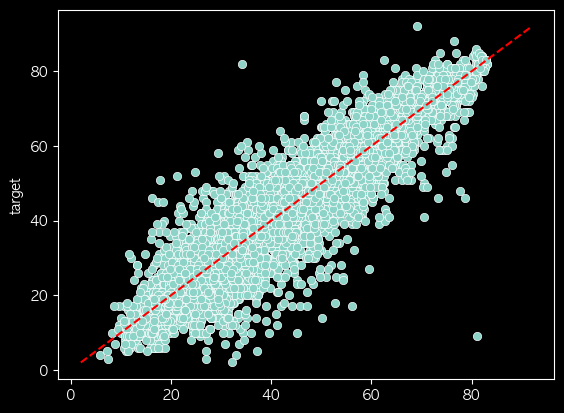

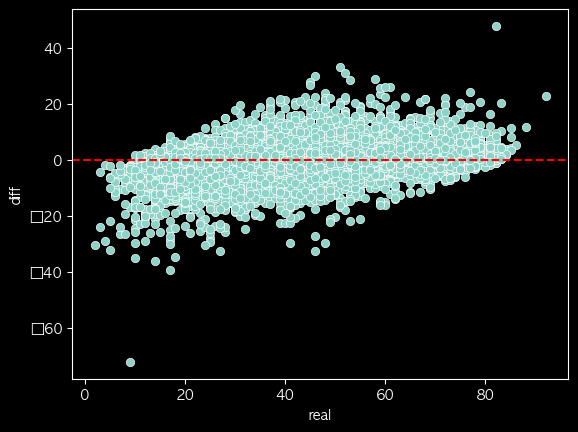

In [335]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


print('===========================================','r2_score', '===========================================')
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

print('===========================================','mean_squared_error', '===========================================')
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

print('===========================================','rmse', '===========================================')
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('===========================================','mean_absolute_error', '===========================================')
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))


print('===========================================','mean_absolute_percentage_error', '===========================================')
print(mean_absolute_percentage_error(y_train, y_pred_train))
print(mean_absolute_percentage_error(y_test, y_pred_test))

def mean_percentage_error(test, pred):
    result = ((test - pred)/test).mean()
    return result


print('===========================================','mean_percentage_error', '===========================================')
print(mean_percentage_error(y_train, y_pred_train))
print(mean_percentage_error(y_test, y_pred_test))



result = pd.DataFrame({'real' : y_test, 'pred' : y_pred_test, 'diff' : (y_test - y_pred_test)})
print(result)


sns.scatterplot(x=y_pred_test, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


sns.scatterplot(data= result, x='real', y='diff')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()





In [303]:
result = pd.DataFrame()

In [304]:
result

Empty DataFrame
Columns: []
Index: []

In [320]:
from sklearn.metrics import r2_score


In [377]:
model_result = pd.DataFrame(columns = ['model','mae', 'mse', 'rmse', 'mape', 'mpe'])


In [357]:
models

Empty DataFrame
Columns: [mae, mse, rmse, mape, mpe]
Index: []

In [372]:
knn_r = KNeighborsRegressor(n_neighbors=5)

In [370]:
xgb_r = xgb.XGBRegressor()
lr = LinearRegression()
svr = SVR()


In [380]:
model_types = [knn_r, xgb_r, rfr, lr, svr]

In [366]:

# rfr.fit(x_train, y_train)


y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)

mape = mean_absolute_percentage_error(y_test, y_pred_test)

mpe = mean_percentage_error(y_test, y_pred_test)

result = pd.DataFrame({
    'model' : 'rfr',
    'mae' : [mae],
    'mse' : [mse],
    'rmse' : [rmse],
    'mape' : [mape],
    'mpe' : [mpe]
})


models = pd.concat([model_result, result], axis=0, ignore_index=True)


In [367]:
result

model       mae        mse      rmse      mape       mpe
0   rfr  3.811223  30.007432  5.477904  0.118453 -0.030454

In [374]:
model_types

['knn_r', 'xgb_r', 'rfr', 'lr', 'svr']

In [376]:
models

mae        mse      rmse      mape       mpe model
0  3.811223  30.007432  5.477904  0.118453 -0.030454   NaN
1  3.811223  30.007432  5.477904  0.118453 -0.030454   rfr

In [384]:
model_types

[KNeighborsRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 RandomForestRegressor(),
 LinearRegression(),
 SVR()]

In [385]:
for model in model_types:
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)

    mape = mean_absolute_percentage_error(y_test, y_pred_test)

    mpe = mean_percentage_error(y_test, y_pred_test)

    result = pd.DataFrame({
        'model' :[model.__class__.__name__],
        'mae' : [mae],
        'mse' : [mse],
        'rmse' : [rmse],
        'mape' : [mape],
        'mpe' : [mpe]
    })

    model_result = pd.concat([model_result, result], axis=0, ignore_index=True)


In [388]:
model_result.sort_values(by='mae', ascending=True)

mae        mse      rmse      mape       mpe  \
6  3.800691  29.879139  5.466181  0.118315 -0.030586   
1  4.805434  40.615819  6.373054  0.153651 -0.053851   
3  4.805434  40.615819  6.373054  0.153651 -0.053851   
5  4.805434  40.615819  6.373054  0.153651 -0.053851   
7  5.318539  51.331720  7.164616  0.168676 -0.056080   
0  5.453446  56.208653  7.497243  0.168539 -0.044963   
2  5.453446  56.208653  7.497243  0.168539 -0.044963   
4  5.453446  56.208653  7.497243  0.168539 -0.044963   
8  5.547657  56.920513  7.544568  0.185216 -0.081185   

                                               model  
6                              RandomForestRegressor  
1  XGBRegressor(base_score=None, booster=None, ca...  
3  XGBRegressor(base_score=None, booster=None, ca...  
5                                       XGBRegressor  
7                                   LinearRegression  
0                              KNeighborsRegressor()  
2                              KNeighborsRegressor()  
4                                KNeighborsRegressor  
8                                                SVR

In [390]:
model_result.sort_values(by='rmse', ascending=True)

mae        mse      rmse      mape       mpe  \
6  3.800691  29.879139  5.466181  0.118315 -0.030586   
1  4.805434  40.615819  6.373054  0.153651 -0.053851   
3  4.805434  40.615819  6.373054  0.153651 -0.053851   
5  4.805434  40.615819  6.373054  0.153651 -0.053851   
7  5.318539  51.331720  7.164616  0.168676 -0.056080   
0  5.453446  56.208653  7.497243  0.168539 -0.044963   
2  5.453446  56.208653  7.497243  0.168539 -0.044963   
4  5.453446  56.208653  7.497243  0.168539 -0.044963   
8  5.547657  56.920513  7.544568  0.185216 -0.081185   

                                               model  
6                              RandomForestRegressor  
1  XGBRegressor(base_score=None, booster=None, ca...  
3  XGBRegressor(base_score=None, booster=None, ca...  
5                                       XGBRegressor  
7                                   LinearRegression  
0                              KNeighborsRegressor()  
2                              KNeighborsRegressor()  
4                                KNeighborsRegressor  
8                                                SVR

In [391]:
model_result.sort_values(by='mape', ascending=True)

mae        mse      rmse      mape       mpe  \
6  3.800691  29.879139  5.466181  0.118315 -0.030586   
1  4.805434  40.615819  6.373054  0.153651 -0.053851   
3  4.805434  40.615819  6.373054  0.153651 -0.053851   
5  4.805434  40.615819  6.373054  0.153651 -0.053851   
0  5.453446  56.208653  7.497243  0.168539 -0.044963   
2  5.453446  56.208653  7.497243  0.168539 -0.044963   
4  5.453446  56.208653  7.497243  0.168539 -0.044963   
7  5.318539  51.331720  7.164616  0.168676 -0.056080   
8  5.547657  56.920513  7.544568  0.185216 -0.081185   

                                               model  
6                              RandomForestRegressor  
1  XGBRegressor(base_score=None, booster=None, ca...  
3  XGBRegressor(base_score=None, booster=None, ca...  
5                                       XGBRegressor  
0                              KNeighborsRegressor()  
2                              KNeighborsRegressor()  
4                                KNeighborsRegressor  
7                                   LinearRegression  
8                                                SVR

In [397]:
y_test.mean(), y_test.std()

(42.66399602949518, 16.02562711624168)

In [408]:
tf_r = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim = x_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


tf_r.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mape'])

tf_r.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=[x_test, y_test])




Epoch 1/10
